<a href="https://colab.research.google.com/github/alatieh/d13C/blob/d13C_data/d13C_model_v26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple model of global δ13C concentration simulations in: Atmosphere, Biosphere, and upper Ocean





#step 0 Introduction & Hypothesis




The carbon cycle is the process through which carbon atoms are exchanged between the atmosphere, land, oceans, and living organisms.

δ13C fluctuates in the Earth system as an indicator of the biosphere’s CO₂ photosynthesis and respiration process. Here is a Simple box model for the δ13C concentration change in the Atmosphere, Biosphere, and upper Ocean. The model runs from  the year 1850 till today. The model uses **G**lobal **C**arbon **P**roject **GCP** estimations of [Friedlingstein et al. (2022)](https://essd.copernicus.org/articles/14/4811/2022/) for the fluxes and reservoir magnitudes. The measurements from [Scrippsco2](https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html) project & the Law Dome Ice Core are used as Ground-truth to correct and calibrate the model.  
This model is more like a back-of-envelope modeling of the system with annual resolution. A further study will be to increase the temporal resolution.
I hypothesize that the model will follow previous study conclusions of:   

* General expected trend is to lower the atmospheric value of δ¹³C.   
* The same CO2 El Niño pattern expected in the δ¹³C fluctuation.  
* A repeat of the annual and interannual cycles.

The significance of the model is the simplification in improve the quantification of the carbon cycle especially the carbon sink in vegetations.

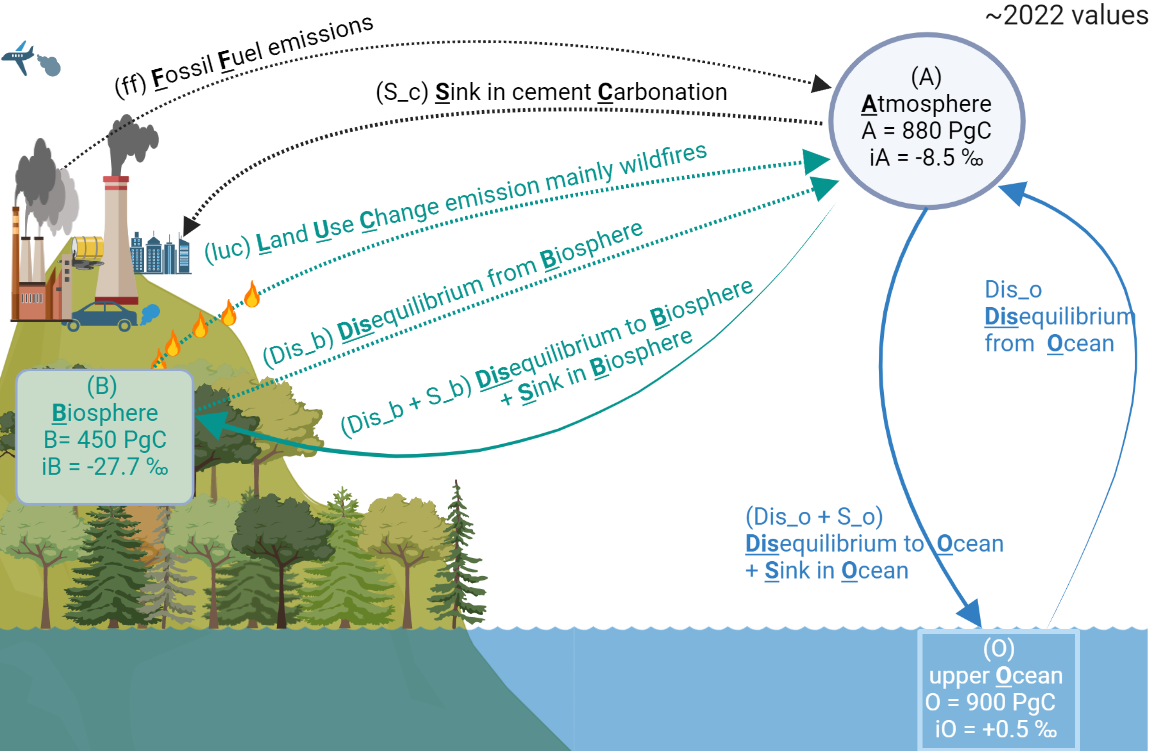

Figure1. Schematic sketch of Carbon reservoirs and fluxes with its name abbreviation in the model. The abbreviation list explained again in table1. The dashed arrows represent fluxes without fractionation. In contrast, the solid arrow represents flux with fractionations. The **black** arrows represent disequilibrium **fossil fuel** and carbonation fluxes. The $\color{green}{\text{green}}$ arrows represent $\color{green}{\text{biospheric}}$ fluxes. The $\color{blue}{\text{blue}}$ arrows represent $\color{blue}{\text{oceanic}}$ fluxes.

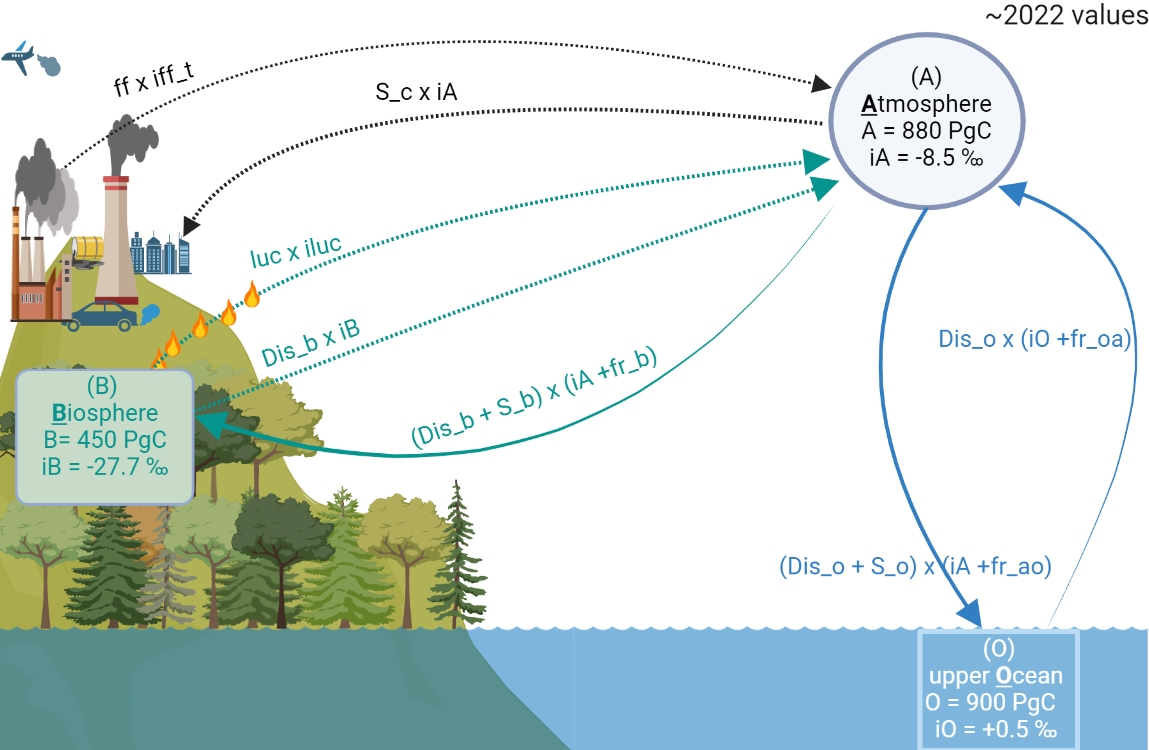

Figure2. Schematic sketch of Carbon fluxes with its isotopic signature, see the model abbreviation list. Fractionation occurs in all fluxes except the four following fluxes (dashed in the figure):   
* The flux of land use change (Luc)
* The disequilibrium flux (Dis_b) from the biosphere to the atmosphere.
* fossil fuel emissions (ff)
* Sink into Carbonations  flux(S_c)

The isotopic signature of (Luc) is assumed to be constant of the average burnt wood and crops. It is added in the parameters section.

The isotopic signature of (Dis_b, ff, and S_c) fluxes are assumed to have the same d13C signature of its origin reservoirs.

List of the abbreviation used in the code

Fluxes in  (PgC/yr). Reservoirs in  (PgC). δ13C in permil (‰). Given value are are the annual


abbreviation |explanation |fixed value or variable| modelled, fully measured, or some measurements
-------|------------|---------|--------------
A |<u>**A**</u>tmospheric Carbon stocks | variable | fully measured
iA |<u>**i**</u>sotopic δ13C signature of <u>**A**</u>tmospeher | variable| fully measured
B |<u>**B**</u>iospheric Carbon stocks | variable| modelled
iB |<u>**i**</u>sotopic δ13C signature of <u>**B**</u>iosphere| variable| some measurements
O |<u>**O**</u>ceanic Carbon stocks | variable| modelled
iO |<u>**i**</u>sotopic δ13C signature of <u>**O**</u>cean| variable|some measurements
 | | |
ff | <u>**f**</u>ossil <u>**f**</u>uel carbon emissions | variable|some measurements
iff_t | <u>**i**</u>sotopic δ13C signature of <u>**f**</u>ossil <u>**f**</u>uel during <u>**t**</u>ime | variable|some measurements
luc| <u>**L**</u>and <u>**U**</u>se <u>**C**</u>hange emissions |variable|modelled
iluc|<u>**i**</u>sotopic δ13C signature of <u>**L**</u>and <u>**U**</u>se <u>**C**</u>hange emissions |-23.7 ‰|modelled
 | | |
S_o |carbon <u>**S**</u>ink to the <u>**o**</u>cean|variable| modelled
S_b |carbon <u>**S**</u>ink to the <u>**b**</u>iosphere|variable| modelled
S_c |carbon <u>**S**</u>ink to the <u>**c**</u>arbonation in buildings|variable| modelled
 | | |
Dis_o |<u>**Dis**</u>equilibrium flux between <u>**o**</u>cean and atmospehre|80 PgC| modelled
Dis_b |<u>**Dis**</u>equilibrium flux between <u>**b**</u>iosphere and atmospehre|55 PgC| modelled
 | | |
fr_b |δ13C <u>**fr**</u>actionation to the <u>**b**</u>iosphere | variable| some measurements
fr_ao |δ13C <u>**fr**</u>actionation from <u>**a**</u>tmospeher to <u>**o**</u>cean | -1.5 ‰ | some measurements
fr_oa |δ13C <u>**fr**</u>actionation from <u>**o**</u>cean to <u>**a**</u>tmosphere| -10.5 ‰| some measurements







**Units clarification**

All units in this model in PgC/y for fluxes and  PgC for reservoirs

All calculations for (C) carbon mass $\color{red}{\text{only}}$. It is not for CO2

All δ13C values in permill VPDB (Pee Dee Belemnite) standard 

**Accessibility and simplification**

The climate issue has become a daily conversation for everyone. To facilitate accessibility for more audiences, I tried to simplify the subject taking in considerations:
- The code provided with extensive comments and self explanatory.
- References work as hyperlink, it will take you directly to the data source.A traditional APA references also added
- Full details are given twice, one inside the code as comment and again in the text.
- To foster the accessibility, an effort was made to make it easy to access by the screen reader. A table of navigation is added on the left side.
- The code available on GitHub as part of the open science


In [80]:
# Import any needed package
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import YouTubeVideo
from sklearn.metrics import mean_squared_error
from datetime import datetime, date, time, timedelta


# Print library versions
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Latest model run was", datetime.now())

Numpy version: 1.22.4
Pandas version: 1.5.3
Seaborn version: 0.12.2
Latest model run was 2023-05-26 08:49:56.444796


In [81]:
# making an index to be used in all time series
startyear = 1850
endyear   = 2021

# We will set the index date of the second of July because it’s the mid of the year, allowing for an approximation of annual resolution.
dates = [(date(year, 7, 2)) for year in range(startyear, endyear + 1)]

In [82]:
# for i in dates:
#   print(i.year);
#   for x in range(12):
#     print(x)

#step1 import GCP data

## Emissions uncertainties of GCP [Friedlingstein et al. (2022)](https://essd.copernicus.org/articles/14/4811/2022/)  
Emissions from **fossil fuel** combustion and industrial processes (uncertainty of **±5%** for a ± 1 sigma confidence level)  

Emissions from **land-use change** (uncertainty of **±0.7 GtC/yr**). Average of three bookkeeping models: H&N (Houghton &Nassikas, 2017), BLUE (Hansis, et al., 2015) and OSCAR (Gasser et al., 2020).  
The **land sink** (uncertainty of **±0.5 GtC/yr** on average) was estimated from the average of 16 dynamic global vegetation models.  

The **ocean sink** (uncertainty of **±0.4 GtC/yr** on average) is estimated from the average of 10 global ocean biogeochemistry models and the average of 7 ocean fCO2 data products.  
The budget imbalance is the sum of emissions (fossil fuel and industry + land-use change) minus (atmospheric growth + ocean sink + land sink + cement carbonation sink); it is a measure of our imperfect data and understanding of the contemporary carbon cycle.  

## Visualize the statistical data of the Carbon budget

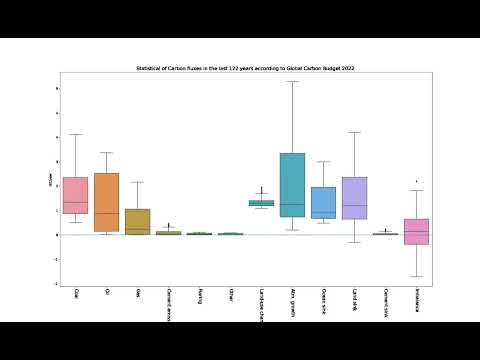

In [83]:
YouTubeVideo('RHU5A3IfDT4')

The plot in the video above begins with the whole data set from 1850 till 2021; then, it iterates to reproduce a boxplot for a shorter period. It ends with the fluxes in the last 21 years. The high variability in land Carbon sinks is apparent. The land sink grows faster than the ocean sink, and land-use changes emissions.

In [84]:
# code only and in steps
# step1
# Making Carbon 13C Isotope Mass Balance Model and implementing it in python

# The objectives of this model are 
# 1. To calculate the amount of total carbon in the three reservoirs atmosphere(A), biosphere(B), and ocean(O) for the whole period from 1850 till today. So, (A, B, O) change in time
# 2. To calculate the Isotopic 13C fraction (in permil) in atmosphere(iA), biosphere(iB), and ocean(iO)  for the whole period from 1850 till today.  So, (i_A , i_B  , i_O) change in time

# Step.1
# Importing the needed from  https://raw.githubusercontent.com/alatieh/d13C/d13C_data/flux_ready.csv as DataFrame (df)
# The DataFrame df columns are:
# (Year,ff,luc,S_o,S_b,S_c,Coal,Oil,Gas,Cement emission,Flaring,Other emission,CO2C)
# I will use the same previous columns name as a vraible in my code. These columns name represent:
# Year: area the years from 1850 till today. This will be the DataFrame index and the time series for the loop that we will develope later.
# ff:  The total annual global fossil fuel carbon emissions (PgC/yr)
# luc: The annual global Land Use Change emissions (PgC/yr)
# S_o: Anthropogenic carbon sink to the ocean(PgC/yr)
# S_b: Anthropogenic carbon sink to the biosphere(PgC/yr)
# S_c: Anthropogenic carbon sink to the buildings carbonation(PgC/yr)
# Coal:   The annual global Coal carbon emissions (PgC/yr)
# Oil:   The annual global Oil carbon emissions (PgC/yr)
# Gas:   The annual global Gas carbon emissions (PgC/yr)
# Cement emission:   The annual global cement_production carbon emissions (PgC/yr)
# Flaring:   The annual global Flaring carbon emissions (PgC/yr)
# Other emission:   The annual global of other carbon emissions (PgC/yr)
# CO2C: The average concetration of CO2 in the atmosphere given in ppm

# then we will plot the imported data


# Importing the data
url = 'https://raw.githubusercontent.com/alatieh/d13C/d13C_data/flux_ready.csv'
df = pd.read_csv(url, index_col='Year', parse_dates=['Year'])
df['S_c'] = df['S_c'].fillna(0) 

# Unify the index to facilitate the comparisons
# We will set the index date to the second of July because it’s the mid of the year
df['dates'] = dates
df = df.set_index('dates')


# Define colors for carbon emissions
emission_colors = ['red' ,'black', 'gray', 'brown', 'pink', 'gray', 'orange']

# Add carbon emission  to the figure
df_emission = df[['luc', 'Coal', 'Oil', 'Gas', 'Cement emission', 'Flaring', 'Other emission']]
emission_names = ['Land Use Change', 'Coal', 'Oil', 'Gas', 'Cement emission', 'Flaring']
emission_colors = ['red', 'black', 'gray', 'brown', 'pink', 'gray']

# Add carbon sinks to the figure
df_sinks = df[['S_o', 'S_b', 'S_c']] * (-1)
sink_names = ['Ocean Sink', 'Biosphere Sink', 'Carbonation Sink']
sink_colors = ['blue', 'green', 'black']


# Plot the data using Plotly
# Create the figure for usual data
fig1 = go.Figure()

# Add carbon emission/sink types to the figure

for column, color, name in zip(df_emission.columns, emission_colors, emission_names):
    fig1.add_trace(go.Scatter(x=df_emission.index, y=df_emission[column], mode='lines', name=name, line=dict(color=color)))


for column, color, name in zip(df_sinks.columns, sink_colors, sink_names):
    fig1.add_trace(go.Scatter(x=df_sinks.index, y=df_sinks[column], mode='lines', name=name, line=dict(color=color, dash='dash')))

# Configure the layout for the first figure
fig1.update_layout(
    title='Annual Global Carbon Emissions & Sinks',
    xaxis_title='Year',
    yaxis_title='Emission/Sink (PgC/yr)',
    yaxis=dict(range=[-4.3, 4.3]),
    legend=dict(x=0.02, y=0.98),
    height=800
)

# Set the title alignment
fig1.update_layout(title=dict(x=0.5))

# Create the figure for cumulative data
fig2 = go.Figure()

# Calculate cumulative data for carbon emission types and carbon sinks
df_cumulative_emission = df_emission.cumsum()
df_cumulative_sinks = df_sinks.cumsum()

# Add cumulative carbon emission types to the figure
for column, color, name in zip(df_cumulative_emission.columns, emission_colors, emission_names):
    fig2.add_trace(go.Scatter(x=df_cumulative_emission.index, y=df_cumulative_emission[column], mode='lines', name=name, line=dict(color=color)))

# Add cumulative carbon sinks to the figure
for column, color, name in zip(df_cumulative_sinks.columns, sink_colors, sink_names):
    fig2.add_trace(go.Scatter(x=df_cumulative_sinks.index, y=df_cumulative_sinks[column], mode='lines', name=name, line=dict(color=color, dash='dash')))

# Configure the layout for the second figure
fig2.update_layout(
    title='Global Carbon Emissions & Sinks (Cumulative from 1850 to 2022)',
    xaxis_title='Year',
    yaxis_title='Cumulative Emission/Sink (PgC)',
    yaxis=dict(range=[-220, 220]),
    legend=dict(x=0.02, y=0.98),
    height=800
)

# Set the title alignment
fig2.update_layout(title=dict(x=0.5))

# Display the figures
fig1.show()
fig2.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 1850-07-02 to 2021-07-02
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ff               172 non-null    float64
 1   luc              172 non-null    float64
 2   S_o              172 non-null    float64
 3   S_b              172 non-null    float64
 4   S_c              172 non-null    float64
 5   Coal             172 non-null    float64
 6   Oil              172 non-null    float64
 7   Gas              172 non-null    float64
 8   Cement emission  172 non-null    float64
 9   Flaring          172 non-null    float64
 10  Other emission   172 non-null    float64
 11  CO2C             172 non-null    float64
dtypes: float64(12)
memory usage: 17.5+ KB


In [86]:
len(df)

172

# Step2 Importing data for comparison


##2.1 Atmospheric comparison

For atmospheric comparison we will use d13C south pole measurments from Scrippsco2 project. For older than 1977, we will use the Law Dome Ice Core data from  ([Rubino et al., 2019](https://www.ncei.noaa.gov/access/paleo-search/study/25830 ))

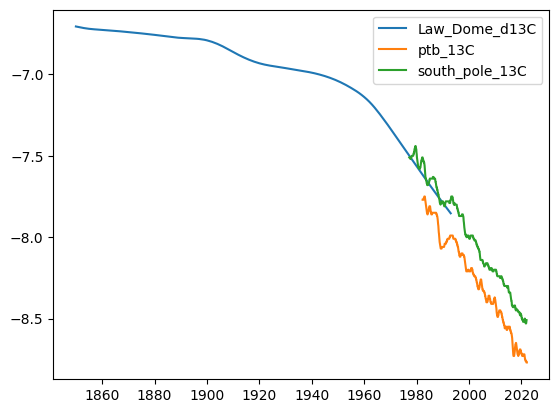

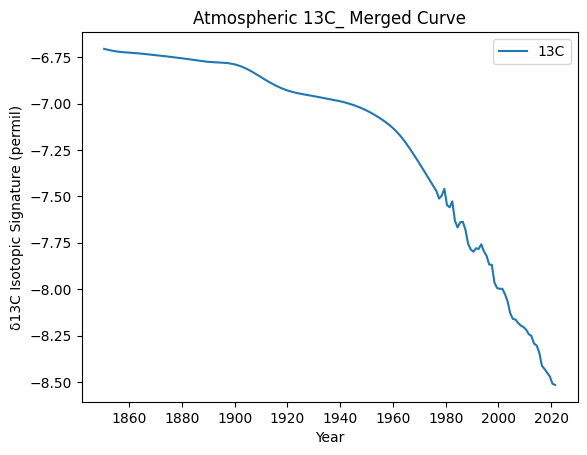

In [87]:
# step2.1   Importing Atmospheric curves for comparison


# importing the d13C south pole measurments from Scrippsco2 project
url_south_pole_13C= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/flask_isotopic/monthly/monthly_flask_c13_spo.csv'
# let us import the columns (3,5,8) 
# Column 3 gives the date in excel format
# the data is on every 15th of each month
# Column 5 gives monthly isotope concentrations in per-mil
# Column 8 is the same smoothed version with the seasonal cycle removed
south_pole_13C = pd.read_csv(url_south_pole_13C, skiprows=60, usecols=[2,4,7])

south_pole_13C.columns=['SPO_date', 'SPO_d13C_monthly', 'SPO_d13C_without_Seasonality']
# Convert the excel date tp python format
south_pole_13C['SPO_date'] = pd.to_datetime(south_pole_13C['SPO_date'], unit='d', origin='1899-12-30')

# convert the data to float BEFORE setting the index, otherwise the dropna function will not work
south_pole_13C['SPO_d13C_monthly'] = south_pole_13C['SPO_d13C_monthly'].astype(float)

south_pole_13C.set_index('SPO_date', inplace =True, drop=True)
south_pole_13C.dropna(inplace = True)

# importing the Barrow_Alaska measurments from Scrippsco2 project
url_ptb_13C= 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/flask_isotopic/monthly/monthly_flask_c13_ptb.csv'
ptb_13C = pd.read_csv(url_ptb_13C, skiprows=60, usecols=[2,4,7])
ptb_13C.columns = ['ptb_date', 'ptb_d13C_monthly', 'ptb_d13C_without_Seasonality']
ptb_13C['ptb_date'] = pd.to_datetime(ptb_13C['ptb_date'], unit='d', origin='1899-12-30')
ptb_13C['ptb_d13C_monthly'] = ptb_13C['ptb_d13C_monthly'].astype(float)
ptb_13C.set_index('ptb_date', inplace =True, drop=True)
ptb_13C.dropna(inplace = True)


# Import the Law_Dome_Ice d13 data
Law_Dome_Ice_core_url = 'https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2018splines.txt'
Law_Dome_d13C_txt = np.loadtxt(Law_Dome_Ice_core_url, delimiter='	', skiprows=948, usecols = (9,10), max_rows=144)
Law_Dome_d13C= pd.DataFrame(Law_Dome_d13C_txt[:,1],columns =['Law_Dome_d13C'])
Law_Dome_d13C['Law_Dome_d13C_date'] = pd.to_datetime(Law_Dome_d13C_txt[:,0], format = '%Y')
Law_Dome_d13C.set_index('Law_Dome_d13C_date', inplace =True, drop=True)

plt.plot(Law_Dome_d13C, label ='Law_Dome_d13C' )
plt.plot(ptb_13C.ptb_d13C_without_Seasonality, label = 'ptb_13C')
plt.plot(south_pole_13C.SPO_d13C_without_Seasonality, label = 'south_pole_13C')
plt.legend()




# merging the south pole and Law Dome data to creat one curve

# Resample the data to annual time step
south_pole_13C_resampled = south_pole_13C['SPO_d13C_without_Seasonality'].resample('A').mean()
law_dome_13C_resampled = Law_Dome_d13C['Law_Dome_d13C'].resample('A').mean()

# Create a new DataFrame to merge the curves
start_year = 1850
current_year = pd.Timestamp.now().year
index_years = pd.date_range(start=f'{start_year}-01-01', end=f'{current_year}-01-01', freq='A')
Atm_merged_13C = pd.DataFrame(index=index_years)
Atm_merged_13C['13C'] = south_pole_13C_resampled

# Fill missing values with Law Dome 13C data
missing_dates = Atm_merged_13C[Atm_merged_13C['13C'].isna()].index
Atm_merged_13C.loc[missing_dates, '13C'] = law_dome_13C_resampled.reindex(missing_dates).values

# unify the index
Atm_merged_13C.dropna(inplace=True)
Atm_merged_13C['dates'] = dates
Atm_merged_13C = Atm_merged_13C.set_index('dates')


# Plot the merged curve
Atm_merged_13C.plot()
plt.xlabel('Year')
plt.ylabel('δ13C Isotopic Signature (permil)')
plt.title('Atmospheric 13C_ Merged Curve')

plt.show()


In [88]:
print("The Antarctica d13 value in the 1850 is about", Atm_merged_13C.iloc[0,0], "permil","\n",
      "We will use the Law dome d13 value in the model as begin value")

The Antarctica d13 value in the 1850 is about -6.7053 permil 
 We will use the Law dome d13 value in the model as begin value


##2.2 Oceanic comparison

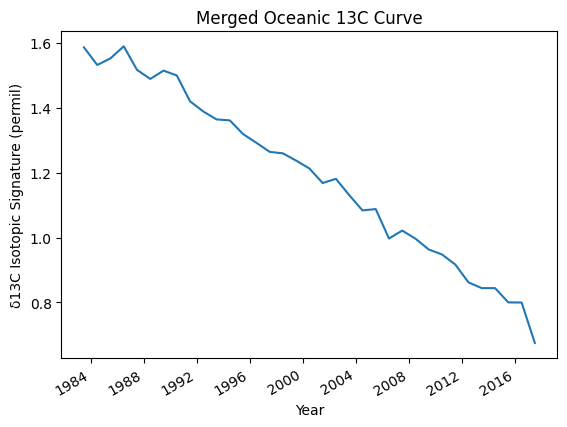

In [89]:
# Step 2.2 Importing oceanic curves for comparison

# importing Scrippsco2 ocean data of  d13C-DIC (per mil) 
# from from surface seawater (depth from 1 to 12 meter)  
# https://scrippsco2.ucsd.edu/data/seawater_carbon/ocean_time_series.html
# I will compare the ocean model with these measurements

# importing the  Hydrostation S (BERM)   measurments from Scrippsco2 project
# Hydrostation 'S' is located ~26 km southeast of the island of Bermuda (32°10'N, 64°30'W)
url_berm_13C= 'https://scrippsco2.ucsd.edu/assets/data/seawater/BERM.csv'
berm_13C = pd.read_csv(url_berm_13C, skiprows=35, usecols=[1,7], parse_dates=[0], index_col = [0])
berm_13C = berm_13C.astype(float)
berm_13C.dropna(inplace = True)
berm_13C.columns=['BERM_d13C']

# importing the  Bermuda Atlantic Time-series Study (BATS) measurments from Scrippsco2 project
# BATS is located ~80 km southeast of Bermuda (31°50’N, 64°10’W)
url_bats_13C= 'https://scrippsco2.ucsd.edu/assets/data/seawater/BATS.csv'
bats_13C = pd.read_csv(url_bats_13C, skiprows=35, usecols=[1,7], parse_dates=[0], index_col = [0])
bats_13C = bats_13C.astype(float)
bats_13C.dropna(inplace = True)
bats_13C.columns=['bats_13C']

# importing the  Hawaii Ocean Time-series Station ALOHA (HAWI)  measurments from Scrippsco2 project
# HOT station ALOHA is located in the North Pacific subtropical gyre ~100 km north of the island of ‘Oahu, Hawaii (22°45’N, 158°00’W).
url_hawi_13C= 'https://scrippsco2.ucsd.edu/assets/data/seawater/HAWI.csv'
hawi_13C = pd.read_csv(url_hawi_13C, skiprows=35, usecols=[1,7],parse_dates=[0], index_col = [0])
hawi_13C = hawi_13C.astype(float)
hawi_13C.dropna(inplace = True)
hawi_13C.columns=['hawi_13C']

# Resample the oceanic curves to annual frequency and take the mean
berm_13C_resampled = berm_13C['BERM_d13C'].resample('A').mean()
bats_13C_resampled = bats_13C['bats_13C'].resample('A').mean()
hawi_13C_resampled = hawi_13C['hawi_13C'].resample('A').mean()

# Merge the three curves by taking the mean
merged_ocean_13C = pd.concat([berm_13C_resampled, bats_13C_resampled, hawi_13C_resampled], axis=1)
merged_ocean_13C['mean_13C'] = merged_ocean_13C.mean(axis=1)


# Extract only the mean as new data frame
ocean_13C = merged_ocean_13C['mean_13C']

# unify the index:
# Get the start year from the existing index
start_year = ocean_13C.index.year[0]
# Create the new index with the desired frequency and dates
new_index = pd.date_range(start=f'07-01-{start_year}', periods=len(ocean_13C), freq='AS-JUL')
# Shift the dates to the second of July
new_index = new_index + pd.DateOffset(days=1)
# Set the new index on the ocean_13C DataFrame
ocean_13C.index = new_index


# Plot the merged curve
ocean_13C.plot()
plt.xlabel('Year')
plt.ylabel('δ13C Isotopic Signature (permil)')
plt.title('Merged Oceanic 13C Curve')
plt.show()

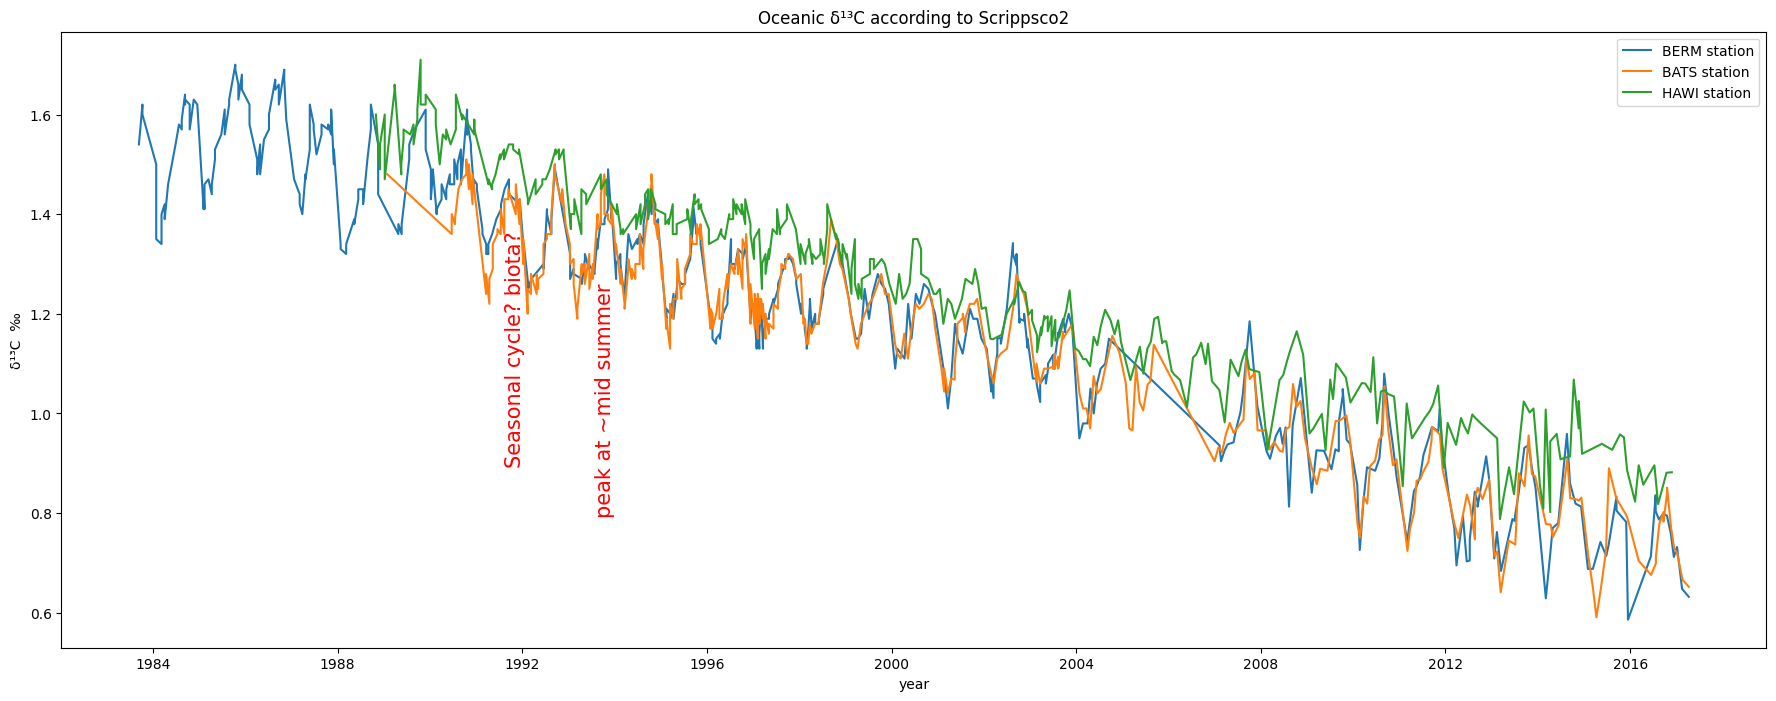

In [90]:
plt.figure(figsize=(22, 8))
plt.plot(berm_13C, label='BERM station')
plt.plot(bats_13C, label='BATS station')
plt.plot(hawi_13C, label='HAWI station')
plt.legend()
plt.text(berm_13C.index[150], 0.9, "Seasonal cycle? biota?", color='r',rotation = 90, fontsize=15)
plt.text(berm_13C.index[180], 0.8, "peak at ~mid summer", color='r',rotation = 90, fontsize=15)
plt.xlabel("year")
plt.ylabel("δ¹³C  ‰")
plt.title("Oceanic δ¹³C according to Scrippsco2")
plt.show()

In [91]:
ocean_13C.head()

1983-07-02    1.586667
1984-07-02    1.532381
1985-07-02    1.552727
1986-07-02    1.590000
1987-07-02    1.517273
Name: mean_13C, dtype: float64

##2.3  Biospheric comparison

The biosphere can be defined as the cumulative total of all ecosystems on Earth. In order to derive a comprehensive indication of the biosphere's d13C value, we will incorporate data from tree ring values. Wood cellulose d13C value changes reflect the atmospheric value change [(Stuiver, M. 1978)](https://doi.org/10.1126/science.199.4326.253). While these tree ring values don't precisely represent the biosphere's absolute value, they do exemplify the broader trend.

This general trend shows a decrease in the trees cellulose d13C value from -24 in 1850 to -26 in 1970 ([Stuiver, 1978](https://doi.org/10.1126/science.199.4326.253)). Other measurements differ but have the same trend. An interannual variability of half permill has been observed, which can likely be ascribed to fluctuations in temperature. "Brazilian trees show a continuation of a downward trend in the entire record" without any variability [(Stuiver, M. 1978)](https://doi.org/10.1126/science.199.4326.253). Other records show higher variability, like the increase of value in the Tasmanian trees between 1950 and 1970 [(Stuiver, M. 1978)](https://doi.org/10.1126/science.199.4326.253).

Moreover, the Tree rings d13C value is subject to changes based on geographical area, climatic conditions, and the specific species. The spatial and genus-specific data relevant to each study will be incorporated directly into the code.

The plant parts can also have different d13 values. Some studie like ([Stuiver, 1978](https://doi.org/10.1126/science.199.4326.253)) used one portion (Heartwood portion cellulose) of the wood instead of the whole wood to avoid the difference between wood contents which can make the measurement unreliable. In general, the Lignin d13C value is four permill higher than cellulose [(Stuiver, M. 1978)](https://doi.org/10.1126/science.199.4326.253).

In the entirety of this code, measurements are taken from 16 different locations. The mean value from these varied locations will be utilized to offer a general indicator of the change in the d13C value.

In [92]:
# Step 2.3    Importing Trees curves for comparison
# I have no biospheric curve so I will import trees curves


# part1 Stuiver data
# Import the (Stuiver, 1978) data
# Douglas fir, the cellulose only
# study location at 47°46'N, 124°06'W
# an altitude of ~120 meters 
# https://doi.org/10.1126/science.199.4326.253
# It is a digitized version of part of the figure 2 bottom

Stuiver_url = 'https://raw.githubusercontent.com/alatieh/d13C/main/stuiver1978.csv'
stuiver_13C = pd.read_csv(Stuiver_url, parse_dates=[0], index_col=[0])

# Adjust the index to the beginning of each year
stuiver_13C.index = stuiver_13C.index - pd.offsets.YearBegin()

#_________________________________________
# part2 Patagonia data
# Import the data from the Patagonia Tree-Ring study
# Tree Species:: Patagonian cypress (Fitzroya)
# Location  LAT	-41.17, LON	-71.78
# (Lavergne et al. 2018)
# Data source: https://www.ncei.noaa.gov/access/paleo-search/study/23630
url = 'https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/southamerica/argentina/patagonia2018d13c.txt'
patagonia_tree_ring_txt = np.loadtxt(url, skiprows=156, encoding='latin-1')
patagonia_tree_ring = pd.DataFrame(patagonia_tree_ring_txt, columns=['Year', 'd13C'])

# Convert the 'Year' column to a datetime format
patagonia_tree_ring['Year'] = pd.to_datetime(patagonia_tree_ring['Year'], format='%Y')

# Set the 'Year' column as the index
patagonia_tree_ring.set_index('Year', inplace=True)

# Resample the data to annual frequency and interpolate missing values
patagonia_tree_ring_resampled = patagonia_tree_ring.resample('A').mean()
patagonia_tree_ring_interpolated = patagonia_tree_ring_resampled.interpolate(method='quadratic')

# Adjust the index to the beginning of each year
patagonia_tree_ring_interpolated.index = patagonia_tree_ring_interpolated.index - pd.offsets.YearBegin()

#_________________________________________

# part3 African Tree-Ring data
# African Tree-Ring data
# data source https://www.ncei.noaa.gov/access/paleo-search/study/20305
# study https://doi.org/10.1002/jqs.2865
# Study       Wils et al. 2016

# Locations and Trees species
# Gondar, Ethiopia (12˚370N, 37˚270E), Juniperus procera trees
# Hugumburda forest, Ethiopia  (12˚150N, 39˚300E), Juniperus procera tree
# KwaZulu-Natal in South Africa (29˚430S, 31˚050E), Mimusops caffra trees
# Koichab Valley in Namibia (26˚130 S, 15˚520 E), Acacia erioloba trees

# Define the URL of the African Tree-Ring data
url_african_tree_ring = 'https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/africa/africa2016d13c-iwue.txt'

# Import the African Tree-Ring data starting from line 209 with tab delimiter
african_tree_ring = pd.read_table(url_african_tree_ring, skiprows=208, header=None, usecols=[0, 6, 7, 8, 9], na_values=['-9999'])

# Assign column names to the DataFrame
column_names = ['Year', 'Ethiopia_Kuskuam mean', 'Ethiopia_Hugumburda', 'SouthAfrica_Kwazulu_Natal', 'Namibia_Koichab_Valley']
african_tree_ring.columns = column_names

# Convert the 'Year' column to datetime format
african_tree_ring['Year'] = pd.to_datetime(african_tree_ring['Year'], format='%Y')

# Set the 'Year' column as the index
african_tree_ring.set_index('Year', inplace=True)

# Resample the data to annual frequency and interpolate missing values
african_tree_ring_resampled = african_tree_ring.resample('A').mean()
african_tree_ring_interpolated = african_tree_ring_resampled.interpolate(method='linear')

# Adjust the index to the beginning of each year
african_tree_ring_interpolated.index = african_tree_ring_interpolated.index - pd.offsets.YearBegin()

#_________________________________________

# part 4 Alaska spruce trees, chapter 1 Bufflehead Road

# importing data from d13C Alaska spruce trees
# Csank et al.2016
# data source = https://www.ncei.noaa.gov/access/paleo-search/study/20024
# study https://esajournals.onlinelibrary.wiley.com/doi/10.1002/eap.1365
# https://doi.org/10.1002/eap.1365
# I will take the live trees measurments from this study
# The study have four locations in south-central Alaska  (Bufflehead Road, Currant Creek, Pedro Bay, Valley of 10,000 Smokes)
# sites exact coordinates
# Bufflehead Road, LAT	60.8067, LON	-150.84
# Currant Creek, LAT	60.3097, LON	-153.9422
# Pedro Bay, LAT	59.7953, LON	-154.0987
# Valley of 10,000 Smokes, LAT	58.3759, LON	-155.3842


# Begin the site (Bufflehead Road)
Alaska_spruce_bufflehead_url = "https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/northamerica/usa/alaska/bufflehead2016iso-crn.txt"

# Fetch data from the URL
response = requests.get(Alaska_spruce_bufflehead_url)
data = response.text

# Extract lines 101 to 147 (inclusive)
lines = data.split("\n")[100:147]

# Process the data and keep only the second and fourth columns
processed_data = []
for line in lines[1:]:  # Start from the second row to skip the header
    columns = line.split()
    year, d13C = int(columns[1]), float(columns[3])
    processed_data.append((year, d13C))

# Create a DataFrame with the date as the index
Alaska_spruce_bufflehead = pd.DataFrame(processed_data, columns=["Year", "d13C"])
Alaska_spruce_bufflehead['Year'] = pd.to_datetime(Alaska_spruce_bufflehead['Year'], format='%Y')
Alaska_spruce_bufflehead.set_index('Year', inplace=True)

# Resample the data to annual frequency and interpolate missing values
alaska_spruce_bufflehead_resampled = Alaska_spruce_bufflehead.resample('A').mean()
alaska_spruce_bufflehead_interpolated = alaska_spruce_bufflehead_resampled.interpolate(method='linear')

# Adjust the index to the beginning of each year
alaska_spruce_bufflehead_interpolated.index = alaska_spruce_bufflehead_interpolated.index - pd.offsets.YearBegin()




# part 4 Alaska spruce trees, chapter 2 Currant Creek

# Importing the (Currant Creek) site data
Alaska_spruce_CurrantCreek_url = "https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/northamerica/usa/alaska/currant2016iso-crn.txt"

# Fetch data from the URL
response = requests.get(Alaska_spruce_CurrantCreek_url)
data = response.text

# Extract lines 108 to 138 (inclusive)
lines = data.split("\n")[106:138]

# Process the data and keep only the second and third columns
processed_data = []
for line in lines[1:]:  # Start from the second row to skip the header
    columns = line.split()
    year, d13C = int(columns[1]), float(columns[2])
    processed_data.append((year, d13C))

# Create a DataFrame with the date as the index
Alaska_spruce_CurrantCreek = pd.DataFrame(processed_data, columns=["Year", "d13C"])
Alaska_spruce_CurrantCreek['Year'] = pd.to_datetime(Alaska_spruce_CurrantCreek['Year'], format='%Y')
Alaska_spruce_CurrantCreek.set_index('Year', inplace=True)


# Resample the data to annual frequency and interpolate missing values
alaska_spruce_currant_creek_resampled = Alaska_spruce_CurrantCreek.resample('A').mean()
alaska_spruce_currant_creek_interpolated = alaska_spruce_currant_creek_resampled.interpolate(method='linear')

# Adjust the index to the beginning of each year
alaska_spruce_currant_creek_interpolated.index = alaska_spruce_currant_creek_interpolated.index - pd.offsets.YearBegin()



# part 4 Alaska spruce trees, chapter 3 Pedro Bay
# import site (Pedro Bay)
Alaska_spruce_PedroBay_url = "https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/northamerica/usa/alaska/pedro2016iso-crn.txt"

# Fetch data from the URL
response = requests.get(Alaska_spruce_PedroBay_url)
data = response.text

# Extract lines 101 to 132 (inclusive)
lines = data.split("\n")[100:132]

# Process the data and keep only the second and fourth columns
processed_data = []
for line in lines[1:]:  # Start from the second row to skip the header
    columns = line.split()
    year, d13C = int(columns[1]), columns[3]
    if d13C != "NA":  # Check if the value is not "NAN"
        d13C = float(d13C)
        processed_data.append((year, d13C))

# Create a DataFrame with the date as the index
Alaska_spruce_PedroBay = pd.DataFrame(processed_data, columns=["Year", "d13C"])
Alaska_spruce_PedroBay['Year'] = pd.to_datetime(Alaska_spruce_PedroBay['Year'], format='%Y')
Alaska_spruce_PedroBay.set_index('Year', inplace=True)




# part 4 Alaska spruce trees, chapter 4 Valley of 10,000 Smokes
#importing site (Valley of 10,000 Smokes)
Alaska_spruce_Valley_url = "https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/northamerica/usa/alaska/smokes2016iso-crn.txt"

# Fetch data from the URL
response = requests.get(Alaska_spruce_Valley_url)
data = response.text

# Extract lines 142 to 181 (inclusive)
lines = data.split("\n")[141:181]

# Process the data and keep only the second and fourth columns
processed_data = []
for line in lines[1:]:  # Start from the second row to skip the header
    columns = line.split()
    year, d13C = int(columns[1]), columns[3]
    if d13C != "NA":  # Check if the value is not "NA"
        d13C = float(d13C)
        processed_data.append((year, d13C))

# Create a DataFrame with the date as the index
Alaska_spruce_Valley = pd.DataFrame(processed_data, columns=["Year", "d13C"])
Alaska_spruce_Valley['Year'] = pd.to_datetime(Alaska_spruce_Valley['Year'], format='%Y')
Alaska_spruce_Valley.set_index('Year', inplace=True)

#_________________________________________

# Part 5 data from pakistan
# importing the data of Pakistan
# Treydte et al. 2006
# https://www.ncei.noaa.gov/access/paleo-search/study/20904
# https://www.nature.com/articles/nature04743

# Locations
# Pakistan Bagrot Valley: LAT	35.9, LON	74.9333 
# Pakistan Boibar Valley:LAT	36.6167, LON	74.9833


# Data URL
Pakistan_13C_url = "https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/asia/pakistan/karakorum2006iso.txt"

# Fetch data from the URL
response = requests.get(Pakistan_13C_url)
data = response.text

# Extract lines for Bagrot Valley and Boibar Valley
Bagrot_lines = data.split("\n")[148:247]
Boibar_lines = data.split("\n")[256:405]

# Function to process the data and create a DataFrame
def process_data(lines):
    processed_data = []
    for line in lines:
        columns = line.split()
        year, d13C = int(columns[0]), float(columns[1])
        processed_data.append((year, d13C))

    df = pd.DataFrame(processed_data, columns=["Year", "d13C"])
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)

    return df

# Create DataFrames for Bagrot Valley and Boibar Valley
Pakistan_Bagrot_Valley = process_data(Bagrot_lines)
Pakistan_Boibar_Valley = process_data(Boibar_lines)


#_________________________________________
# part 6 Lake Baikal data
# Importing data from Lake Baikal data
# Voronin et al 2008
# It has three data sites ( Davan Pass , Irkutsk , Olkhon Island)
# https://www.ncei.noaa.gov/access/paleo-search/study/22455

# Tree species: Larix sibirica

# Locations
# Davan Pass ,LAT	55.85, LON	108.9167
# Olkhon Island ,LAT	53.2833, LON	107.6333
# Irkutsk ,LAT	52.2333, LON	104.1833

# Function to fetch and process data
def fetch_data(url, start_line):
    response = requests.get(url)
    data = response.text
    lines = data.split("\n")[start_line-1:]
    
    processed_data = []
    for line in lines:
        columns = line.split()
        if len(columns) == 2:
            year, d13C = int(columns[0]), float(columns[1])
            processed_data.append((year, d13C))
    
    df = pd.DataFrame(processed_data, columns=["Year", "d13C"])
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    
    return df

# Fetch data for Davan Pass, Irkutsk, and Olkhon Island
Davan_Pass = fetch_data("https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/asia/russia/davan2012d13c.txt", 618)
Irkutsk = fetch_data("https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/asia/russia/irkutsk2012d13c.txt", 324)
Olkhon_Island = fetch_data("https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/asia/russia/olkhon2012d13c.txt", 347)

#_________________________________________


# part 7 Peru data

# importing Peru Tree Ring isotope data
# Ballantyne et al 2011

# Species: Cedrela odorata

# Location
# Peru, Puerto Maldonado, LAT	-12.6, LON	-69.2

# source : https://www.ncei.noaa.gov/access/paleo-search/study/9910

# Modify the fetch_data function to use the fourth column (d13C) and end at a specified line
def fetch_data_v2(url, start_line, end_line):
    response = requests.get(url)
    data = response.text
    lines = data.split("\n")[start_line-1:end_line]
    
    processed_data = []
    for line in lines:
        columns = line.split()
        if len(columns) >= 4:
            year, d13C = int(columns[0]), float(columns[3])
            processed_data.append((year, d13C))
    
    df = pd.DataFrame(processed_data, columns=["Year", "d13C"])
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    
    return df

# Fetch data for Puerto Maldonado using the modified function
Peru_Puerto_Maldonado = fetch_data_v2("https://www.ncei.noaa.gov/pub/data/paleo/treering/isotope/southamerica/ballantyne2011tr-iso.txt", 134, 288)

#_________________________________________


In [93]:
# calculating the statistics of all these data to find the mean, max, min

#Remove duplicate index values from all DataFrames
stuiver_13C = stuiver_13C[~stuiver_13C.index.duplicated()]
patagonia_tree_ring_interpolated = patagonia_tree_ring_interpolated[~patagonia_tree_ring_interpolated.index.duplicated()]
african_tree_ring_interpolated = african_tree_ring_interpolated[~african_tree_ring_interpolated.index.duplicated()]
alaska_spruce_bufflehead_interpolated = alaska_spruce_bufflehead_interpolated[~alaska_spruce_bufflehead_interpolated.index.duplicated()]
alaska_spruce_currant_creek_interpolated = alaska_spruce_currant_creek_interpolated[~alaska_spruce_currant_creek_interpolated.index.duplicated()]
Alaska_spruce_PedroBay = Alaska_spruce_PedroBay[~Alaska_spruce_PedroBay.index.duplicated()]
Alaska_spruce_Valley = Alaska_spruce_Valley[~Alaska_spruce_Valley.index.duplicated()]
Pakistan_Bagrot_Valley = Pakistan_Bagrot_Valley[~Pakistan_Bagrot_Valley.index.duplicated()]
Pakistan_Boibar_Valley = Pakistan_Boibar_Valley[~Pakistan_Boibar_Valley.index.duplicated()]
Davan_Pass = Davan_Pass[~Davan_Pass.index.duplicated()]
Irkutsk = Irkutsk[~Irkutsk.index.duplicated()]
Olkhon_Island = Olkhon_Island[~Olkhon_Island.index.duplicated()]
Peru_Puerto_Maldonado = Peru_Puerto_Maldonado[~Peru_Puerto_Maldonado.index.duplicated()]

# Concatenate all the DataFrames along the columns axis
combined_data = pd.concat([
    stuiver_13C['d13C'].rename('Stuiver'),
    patagonia_tree_ring_interpolated['d13C'].rename('Patagonia'),
    african_tree_ring_interpolated.mean(axis=1).rename('African'),
    alaska_spruce_bufflehead_interpolated['d13C'].rename('Alaska Bufflehead'),
    alaska_spruce_currant_creek_interpolated['d13C'].rename('Alaska Currant Creek'),
    Alaska_spruce_PedroBay['d13C'].rename('Alaska Pedro Bay'),
    Alaska_spruce_Valley['d13C'].rename('Alaska Valley of 10,000 Smokes'),
    Pakistan_Bagrot_Valley['d13C'].rename('Pakistan Bagrot Valley'),
    Pakistan_Boibar_Valley['d13C'].rename('Pakistan Boibar Valley'),
    Davan_Pass['d13C'].rename('Lake Baikal Davan Pass'),
    Irkutsk['d13C'].rename('Lake Baikal Irkutsk'),
    Olkhon_Island['d13C'].rename('Lake Baikal Olkhon Island'),
    Peru_Puerto_Maldonado['d13C'].rename('Peru Puerto Maldonado')
], axis=1)

# Calculate the mean, maximum, and minimum values along the rows axis
mean_values = combined_data.mean(axis=1)
max_values = combined_data.max(axis=1)
min_values = combined_data.min(axis=1)

# Create a new DataFrame with the mean, maximum, and minimum values
statistics_treesRing = pd.DataFrame({'Mean': mean_values, 'Max': max_values, 'Min': min_values})

# The final product that I will use further in the code is the mean value of Biosphere statistics_treesRing['Mean']
# I will use the mean value in the comparison with my model

# Display the new DataFrame
print(statistics_treesRing)


                 Mean      Max        Min
1850-01-01 -22.599259 -18.3200 -28.890000
1851-01-01 -22.583143 -18.1400 -28.580000
1852-01-01 -22.380343 -17.6900 -28.190000
1853-01-01 -22.768918 -17.9900 -28.040000
1854-01-01 -22.691343 -17.8500 -28.370000
...               ...      ...        ...
2007-01-01 -24.148294 -22.6327 -25.043870
2008-01-01 -24.012342 -22.9396 -24.550236
2009-01-01 -24.290070 -23.4368 -25.347371
2010-01-01 -24.594334 -23.3676 -25.582037
2011-01-01 -23.962227 -23.0954 -24.829055

[162 rows x 3 columns]


In [94]:
# making a a map for all trees ring d13C measurments locations

# Create a map figure
map_fig = go.Figure()

# Add markers for each location with the same colors as the curves
locations = {
    'Stuiver': (47.7667, -124.1),  # Stuiver location
    'Patagonia': (-41.17, -71.78),  # Patagonia location
    'Gondar, Ethiopia': (12.37, 37.27),  # Gondar, Ethiopia location
    'Hugumburda forest': (12.15, 39.3),  # Hugumburda forest location
    'KwaZulu-Natal, South Africa': (-29.43, 31.05),  # KwaZulu-Natal, South Africa location
    'Koichab Valley, Namibia': (-26.13, 15.52),  # Koichab Valley, Namibia location
    'Alaska Bufflehead': (60.8067, -150.84),  # Alaska Bufflehead location
    'Alaska Currant Creek': (60.3097, -153.9422),  # Alaska Currant Creek location
    'Alaska Pedro Bay': (59.7953, -154.0987),  # Alaska Pedro Bay location
    'Alaska Valley of 10,000 Smokes': (58.3759, -155.3842),  # Alaska Valley of 10,000 Smokes location
    'Pakistan Bagrot Valley': (35.9, 74.9333),  # Pakistan Bagrot Valley location
    'Pakistan Boibar Valley': (36.6167, 74.9833),  # Pakistan Boibar Valley location
    'Lake Baikal Davan Pass': (55.85, 108.9167),  # Lake Baikal Davan Pass location
    'Lake Baikal Irkutsk': (52.2333, 104.1833),  # Lake Baikal Irkutsk location
    'Lake Baikal Olkhon Island': (53.2833, 107.6333),  # Lake Baikal Olkhon Island location
    'Peru Puerto Maldonado': (-12.6, -69.2)  # Peru Puerto Maldonado location
}

curve_colors = ['blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'pink', 'brown', 'gray', 'lime','red', 'red','red','red','red','red','red','red','red',]

for i, (curve, location) in enumerate(locations.items()):
    color = curve_colors[i % len(curve_colors)]  # Cycle through colors using modulo
    map_fig.add_trace(go.Scattergeo(
        lon=[location[1]],
        lat=[location[0]],
        mode='markers',
        marker=dict(size=10, color=color),
        name=curve,
        showlegend=False
    ))

# Set layout for the map figure
map_fig.update_layout(
    title="Tree rings d13C measurment locations",
    geo=dict(
        scope='world',
        projection_type='natural earth',
        showland=True,
        landcolor='lightgray',
        showcountries=True,
        countrycolor='gray',
        showocean=True,
        oceancolor='lightblue',
        showlakes=True,
        lakecolor='lightblue'
    )
)

# Show the map figure
map_fig.show()


In [95]:
# plotting the curve with the mean, min, max to compare trees ring d13C value

# Create a figure
fig = go.Figure()

# Add curves to the figure
for i, column in enumerate(combined_data.columns):
    color = curve_colors[i % len(curve_colors)]  # Cycle through colors using modulo
    fig.add_trace(go.Scatter(
        x=combined_data.index,
        y=combined_data[column],
        mode='lines',
        name=column,
        line=dict(color=color),
        legendgroup='Curves'
    ))

# Define the variations of red color for African locations
african_color = ['red', 'darkred', 'lightcoral', 'indianred']

# Add African locations to the figure
for i, column in enumerate(african_tree_ring_interpolated.columns):
    fig.add_trace(go.Scatter(
        x=african_tree_ring_interpolated.index,
        y=african_tree_ring_interpolated[column],
        mode='lines',
        name=column,
        line=dict(color=african_color[i % len(african_color)]),
        legendgroup='African Locations'
    ))

# Add statistics to the figure
for column in statistics_treesRing.columns:
    line_dash = 'solid' if column == 'Mean' else 'dash'
    line_width = 3 if column == 'Mean' else 1.5
    fig.add_trace(go.Scatter(
        x=statistics_treesRing.index,
        y=statistics_treesRing[column],
        mode='lines',
        name=column,
        line=dict(color='black', dash=line_dash, width=line_width),
        legendgroup='Statistics'
    ))

# Set layout
fig.update_layout(
    title="Comparison of trees ring d13C value",
    xaxis_title="Year",
    yaxis_title="d13C",
    legend=dict(
        x=1.02,
        y=0.5,
        orientation='v',
        traceorder='reversed',
        title='Legend',
        title_font=dict(size=14),
        bgcolor='rgba(255, 255, 255, 0.5)'
    )
)

# Show the figure
fig.show()


In [96]:
# unify the index:
# Get the start year from the existing index
start_year = statistics_treesRing.index.year[0]

# Create the new index with the desired frequency and dates
tree_index = pd.date_range(start=f'07-01-{start_year}', periods=len(statistics_treesRing), freq='AS-JUL')

# Shift the dates to the second of July and setting it as index
statistics_treesRing.index = tree_index + pd.DateOffset(days=1)

# The final product that I will use further in the code is the mean value of Biosphere statistics_treesRing['Mean']
# I will use the mean value in the comparison with my model

statistics_treesRing.tail()

,Mean,Max,Min
2007-07-02,-24.148294,-22.6327,-25.043870
2008-07-02,-24.012342,-22.9396,-24.550236
2009-07-02,-24.290070,-23.4368,-25.347371
2010-07-02,-24.594334,-23.3676,-25.582037
2011-07-02,-23.962227,-23.0954,-24.829055


#Step 3 parameters

This model includes eight parameters which are as follows:

* **Initial size of the carbon stocks** reservoir in the ocean and biosphere: This represents the total amount of carbon stored in these respective "reservoirs" at the beginning of the model run. In the case of the ocean, this includes carbon stored as dissolved inorganic carbon, while in the biosphere it includes carbon stored in living and dead organic matter

* **Magnitude of the disequilibrium fluxes**: In the context of the carbon cycle, "disequilibrium fluxes" likely refer to fluxes of carbon that move the system away from equilibrium. The magnitude of these fluxes would be a measure of how much carbon is moving in or out of the different components of the system. In disequilibrium fluxes the total carbon in = the total C out but the signatutre of the in is not equal to the signature of out Caarbon.

* **Average fractionation** between the ocean and atmosphere, and from the atmosphere to vegetation: "Fractionation" refers to the preferential removal or addition of one isotope over another during physical or biological processes. In the context of carbon, it refers to how the ratio of Carbon-13 to Carbon-12 changes when carbon moves between the ocean, atmosphere, and biosphere.

* The **d13C signature of emissions from fossil fuels and land use change (LUC)**: The "d13C signature" is a measure of the ratio of Carbon-13 to Carbon-12 in a sample, relative to a standard. Fossil fuels and land use changes can influence the atmospheric d13C signature because they involve releasing carbon with different d13C signatures into the atmosphere.

Each of these parameters would need to be carefully estimated or calibrated using observational data to ensure the accuracy of the model predictions. Changes in any of these parameters would likely have a significant impact on the model's output.

## The initial size of the carbon stocks reservoir in the ocean and biosphere.

**The Atmosphere begin stocks**

The atmospheric CO2 concentration in the 1850 is known from the Law Dome data, which is a reliable source for historic CO2 concentration. We could convert it to total carbon stocks using the equation of 

$\frac{5.1352 \times 12.011}{28.96546 +12.011\times(x −400)\times 10^-{6} }\times x$  
Where is $x$ is the CO2 concentration in ppm
As we discussed in previous [research](https://github.com/alatieh/Global_C). This yields a value of **609** PgC in the atmosphere of 1850. A second approach can be use backcalculation of the known today value and the GCP flux estimations ([Friedlingstein et al. (2022)](https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022-f02-web.png )) to reproduce  the 1850 value, this will confirm our assumption.




**The biosphere begin stocks**

There is a high uncertainty of the biosphere beginning stock. The high uncertainty resulted firstly from the fact that the “Biosphere” is the collective term for total ecosystemS. The minimum number can be used is 150 PgC  (Bar-On et al., 2018). 150 PgC  represents the active and live part of the plants. The maximum estimation is 2150 PgC which represents the sum of vegetation and soil carbon as in Friedlingstein, et al. (2022)
Then, The mid value between the maximum and minimum estimation is **1150** PgC with a fluctuations of ± 87%



**The Ocean begin stocks**

In this model we worked with the upper ocean. Nevertheless, there is no real boundary between the upper and lower ocean. The total DIC in the ocean is 37 000 PgC as in Friedlingstein, et al. (2022). Here we made the assumption that the DIC is representative of the carbon in the ocean. There is an implicit compensation for the deep ocean flux and the Biological pump. I will use the previous estimation of the upper ocean of **900** PgC as in  Keeling et al. (2017). I will assume a high uncertainty of +10 00%   and -50%

The assumption of a significant uncertainty (up to +1000% and -50%) captures the significant unknowns associated with this parameter.

In all reservoirs , I assumed that the reservoir mixed annually completely. A yearly mixing assumption for all reservoirs is a simplification, but should be suitable for a high-level model such as this one. However, it's important to bear in mind that this might not capture all the intricacies of the carbon cycle, especially in situations where shorter time scales or more detailed spatial variability are important.


##  The magnitude of the disequilibrium fluxes.

Disequilibrium carbon fluxes refer to the imbalances in the movement of carbon between different reservoirs in the Earth's carbon cycle. Understanding and quantifying disequilibrium carbon fluxes are important for assessing the impact of human activities on the carbon cycle and developing strategies to mitigate climate change. Scientists study these fluxes through various methods, including direct measurements of atmospheric CO2 concentrations, analysis of carbon isotope ratios, and modeling techniques to simulate carbon cycle dynamics.

In a state of equilibrium, the isotopic carbon fluxes exchange between these reservoirs are balanced, meaning that the amount of carbon entering a particular reservoir is approximately equal to the amount leaving it. However, human activities like land use change and fossil fuel emissions disrupt this equilibrium and lead to disequilibrium carbon fluxes.

In this model, *disequilibrium carbon fluxes* are defined as the flux when total amount of carbon entering a reservoir is equal to the total amount leaving it. However, it is essential to note that after distorting the equilibrium (post-1850 in this model), the isotopic composition of the carbon influx differ from the isotopic composition of the outflux. These disequilibrium carbon fluxes in the model impact the values of different reservoirs by maintaining the difference between them equal to the fractionation ratio difference. In other words, the disequilibrium fluxes in the model ensure that the value of the biosphere remains at the level of the atmospheric value plus the fractionation, and the same principle applies to the oceanic value.

### Biospeher disequilibrium fluxes   
There are high variations in the estimated value of annual vegetation CO2 disequilibrium fluxes ([Koren et al. 2019](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD030387 )). These different values resulted from different calculation methods. [Beer et al. (2010)](https://doi.org/10.1126/science.1184984) used eddy covariance measurements of the CO2 method and estimated 120 PgC/year for Gross primary production GPP. In contrast, [Welp et al. (2011)](https://doi.org/10.1038/nature10421) used the isotopic CO2 variation and reported 150–175 PgC/year range values. [Koren et al. (2019)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD030387 ) used the TM5 model and estimated a vegetation disequilibrium flux of 111 GtC averaged over years 2012 and 2013. [Hofmann et al. (2017)](https://doi.org/10.1016/j.gca.2016.11.019 ) reported 103 GtC of vegetaion flux. [Hoag et al. (2005)](https://doi.org/10.1029/2004GL021011) reported 85.6 of vegetaion flux. [Friedlingstein et al. (2022)](https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022-f02-web.png )  reported a flux of 130 PgC/year value.

Keeling et al. ([2017](https://doi.org/10.1073/pnas.1619240114)) made a model with three biosphere boxes instead of one biosphere box. In their estimations, the total disequilibrium fluxs of the three biospheric compartments was 55 PgC/year. In this simple model, I will use this estimation of **55** PgC/year but for the biosphere as one box. Furthermore, I will assume an uncertainty of 20%. 

In this simple model, the Biospeher disequilibrium flux (or GPP) is assumed to be constant, which may not reflect the reality of natural fluctuations over the course of the year. Therefore, incorporating this variation in future models could increase the accuracy and reliability of the model outcomes.

###Ocean disequilibrium flux  
[Koren et al. (2019)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD030387) calculated an ocean disequilibrium flux of 86.9 GtC. [Hofmann et al. (2017)](https://doi.org/10.1016/j.gca.2016.11.019) reported 90 GtC of ocean flux. [Hoag et al. (2005)](https://doi.org/10.1029/2004GL021011) reported 88 of ocean flux.

In this model I will use the value of **80** PgC/year. I will assume an uncertainty of 20%

No model can perfectly represent the complexities of the real world

### Soil disequilibrium flux  
The magnitudes of the soil disequilibrium
flux has high uncertainty. [Hofmann et al. (2017)](https://doi.org/10.1016/j.gca.2016.11.019) estimated 30 GtC as a disequilibrium flux (from & to) the soil through water. Same estimation reported by ([Stern et al., 2001](https://doi.org/10.1029/2000GB001373)). Neverthless, [Wingate et al., (2009)](https://doi.org/10.1073/pnas.0905210106 ) has a higher estimation of soil flux of 450 GtC/year. The utilization of anhydrase enzyme in soils is the responsible for this high soil invasion flux ([Wingate et al., 2009](https://doi.org/10.1073/pnas.0905210106)). 

In this simple model, I will not consider the soil flux because it is implicitly a part of the biosphere reservoir.

##  Average fractionation between ocean & atmosphere, as well as from atmosphere to vegetations.

1. **The flux from atmospher to the ocean d13C Fractionation (fr_ao)**. 

[Battle et al (2000)](https://www.science.org/doi/abs/10.1126/science.287.5462.2467) calculated the ocean kinetic fractionation as (-2.0 ± 1.0‰).. [Battle et al (2000)](https://www.science.org/doi/abs/10.1126/science.287.5462.2467) took this estimation originally from both ([Siegenthaler & Münnich,1981](https://scope.dge.carnegiescience.edu/SCOPE_16/SCOPE_16_1.5.05_Siegenthaler_249-257.pdf); Rik Wanninkhof,1985). Rik Wanninkhof (1985) wrote: "*The experimental results give a fractionation of-2.4 ± 2.0‰ while the calculated value for invasion is-2.1 ± 0.3‰ (i.e. 13CO2 invading slower), The results show that the fractionation of CO2 during invasion into a hydroxide solution (-14‰) is clearly too high as a value for invasion into seawater and should no longer be used as an upper limit in CO2 models.*   

In this model,  I will use this value of (**-1.5‰**) in the model as a  parameter  for the fractionation from atmosphere to ocean (fr_ao)

<br>

2. **The flux from ocean to air d13C Fractionation (fr_oa)**. 

[Siegenthaler & Münnich (1981)](https://scope.dge.carnegiescience.edu/SCOPE_16/SCOPE_16_1.5.05_Siegenthaler_249-257.pdf) " considered a value of *-9.7 to -10.2%  for ocean-to-atmosphere transfer*". I will use a value of **-10.5‰** in this model. Rik Wanninkhof (1985) mentioned a value of ( from -0.7 to +1.6) but it was not pretty clear in his paper if this number for this flux.

<br>

The values of (fr_ao, and fr_oa) were chosen carefully to agree with the assumption of equilibrium before 1850. The equilibrium before 1850 means that the isotopic value of the reservoir does not change with time. So the δ13C values for the reservoirs in 1850 are equal to the isotopic value of the fluxes times the fractionations as we setup in (step 5 Calculate 13C fraction.)

<br>

3. **The flux from atmosphere to the biosphere d13C Fractionation (fr_b)**

photosynthetis favor the lighter carbon isotope 12C which make the biosphere depleted in d13C [(Brugnoli & Farquhar, 2000)](https://link.springer.com/chapter/10.1007/0-306-48137-5_17) . The fractionation yields lower value in C3 vegetations like trees ~d13C=-25, than the fractionation in C4 vegetation like grasses and some crops ~ d13C=-13 (Ruddiman, W. F. ,2001). According to [Battle et al (2000)](https://www.science.org/doi/abs/10.1126/science.287.5462.2467), the fractionation value is (-18 ‰) for all in general. 

The value of (-16.5 ‰) reported by [Still et al. (2003)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001807) after considering **assimilation-weighted** terrestrial discrimination against 13CO2 for both C3 and C4 photosynthesis paths.  

Keeling et al., ([2017](https://www.pnas.org/doi/full/10.1073/pnas.1619240114)) show that fractionation increases with increasing atmospheric CO2. I will use the follwing equation which is based on Keeling et al., ([2017](https://www.pnas.org/doi/full/10.1073/pnas.1619240114)) estimation range   
$ \delta F = - 0.014 × x_{CO2} +z$  
where is : 
* $\delta F$  is the Photosynthetis Fractionation in ‰   
* $x_{CO2} $ is the atmospheric concentration in ppm
* $z$ is a constant of (-13)

For the sake of simplicity, I assume that the relationship between CO2 and fractionation has no uncertainty. I will assume that the certainty in the term $z$ with a range of 30%

The fractionations value in the model is a rough estimation. The high uncertainty of 30% resulted from the following facts: 
* We do not know precisely the distribution of C3, C4, and CAMS plants
* Photosynthesis fractionation changes in (time, species, and weather conditions.)
* photosynthesis fractionations are also affected by tree height, canopy position, and light exposure ([Vadeboncoeur et al., 2020](https://academic.oup.com/treephys/article/40/3/333/5715048)) 
* It is not only the living plants; there are other living carbon reservoir and organic (dead reservoirs). All are the biosphere.




##  The d13C signature of emissions from fossil fuels and land use change (LUC).

### Estimating fossil fuel Fluxes δ13C value

In general, fossil fuel δ13C values differ per geological and sedimentation conditions beside the difference between the different fossil fuel types. In simple calculation, the [Global Monitoring Laboratory](https://gml.noaa.gov/ccgg/isotopes/c13tellsus.html)  considers all fossil fuels to have the value of -28. In the next lines I will review the literature value for every fossil fuel :

* For Gas: In this model we will assign the value of (-44.5) to the Gas. It is a very rough estimation because: for example for Gas there are three main types (conventional gas, shale gas, and coal gas) beside the extraction and the geological layer that differ. The value of (-44.5) is an average of the natural gas/coal from page 13, table5  of [Menoud et al. 2022](https://essd.copernicus.org/articles/14/4365/2022/essd-14-4365-2022.pdf). Others have lower values for gas like figure 7 from ([Sherwood et al, 2017](https://essd.copernicus.org/articles/9/639/2017/ )) who reported flux-weighted average of all sources produces a mean atmospheric δ13C CH4 of∼−53.6 ‰. whereas, ([Sherwood et al, 2017](https://essd.copernicus.org/articles/9/639/2017/ )) in page 7: calculated a mean value of -44.8 for gas (mean of all conventional, coal and shale gas), -61.7 gas from microbial sources, and -26.2 for biomass burning. [Stuiver, M. (1978)](https://doi.org/10.1126/science.199.4326.253) reported arange between -35 and -48.   
* The value of flaring assumed the same as the gas value
* The value of of  coal_13C (-24.1) and oil_13C (-30) are obtained from page 8 of ( [Andres et al. 1994](https://www.osti.gov/servlets/purl/10185357 )). [Stuiver, M. (1978)](https://doi.org/10.1126/science.199.4326.253) reported values range between -22 to -28 for coal and oil.  Again, our estimated value is It is a very rough estimation because coal can vary in spectrum between hard, brown coal, and other coals. Furthermore, peat can be listed under coal. Other issues in allocating the fossil type in the budget; natural gas liquids accounted in the Global carbon Budget as liquid fossil fuel, that means it will appear as oil in the budget ([Andrew & Peters, 2022](https://doi.org/10.5281/ZENODO.7215364), p3). In this model I will use a value of -22 for coal.     
* The value of cement_13C assumed to be same as the coal because coal is the fuel used to produce cement
* The value of other_13C (0.3) because [Andrew & Peters(2022](https://doi.org/10.5281/ZENODO.7215364), p5) pointed out that this category in GCP is namely for decomposition of carbonates. The value of 0.3 for cement carbonate obtained from page 9 of Andres et al. (1994, P9). I assumed that carbonate is only cement production, which is good approximation because it's ~80% of global carbonate emissions ([Andrew, 2020,](https://doi.org/10.5194/essd-12-1437-2020) p9)   

I assumed an uncertainty parameter of 20% in fossil fuel δ13C values

### d13C signature of emissions LUC
I assume that Land Use Change LUC d13C isotopic signature originated from wildfire, which consists of:
* Old wood. The old wood value corresponds with the first biosphere value of -22 ± 6 ‰
* crops residual (which have a high C4 percentage). C4 value correspond with ~ -13 ‰
* organic matters

Assume that the quarter of the LUC is a C4 and the rest is old wood that yields a value of ~ -20
There is high uncertainty in this value. I will assume a parameter of 40%


In [97]:

# Step.3 parameters
# prepare and define the needed data for the model with Optimizable parameters


# The initial size of the carbon stocks reservoir in the ocean and biosphere.

# .... 💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱🍀🍁 .... 

# The biosphere begin stocks
# There is a high uncertainty of the biosphere beginning stock. 
# The high uncertainty resulted firstly from the fact that the “Biosphere” is the collective term for total ecosystemS. 
# The minimum number can be used is 150 PgC  (see the supplementary of From Bar-On et al. (2018) page 85)
# 150 PgC  represents the active and live part of the plants
# The maximum estimation is 2150 PgC which represents the sum of vegetation and soil carbon as in Friedlingstein, et al. (2022)
# Then, The mid value between the maximum and minimum estimation is 1150 PgC with a fluctuations of ± 87%

B_begin = 2150 # PgC  from the GCP figure
B_begin_par = 1 # Parameter for the begin biosphere carbon stocks B_begin
B_begin_par_delta = 0.87 # Assume that range is 87%

B_begin = B_begin * B_begin_par


# .... 💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱🍀🍁 .... 

# In this model we worked with the upper ocean. Nevertheless, there is no real boundary between the upper and lower ocean.
# The total DIC in the ocean is 37 000 PgC as in Friedlingstein, et al. (2022)
# Here we made the assumption that the DIC is representative of the carbon in the ocean 
# There is an implicit compensation for the deep ocean flux and the Biological pump
# I will use previous estimation of upper ocean of 900 PgC as in  Keeling et al. (2017)
# I will assume a high uncertainty of +10 00%   and -50%

O_begin = 1550  # after the cost function 🌼
O_begin_par = 1 # Parameter for the begin Ocean carbon stocks O_begin
O_begin_par_delta_positive = 10 # Assume that range is 1000%
O_begin_par_delta_negative = 0.5 # Assume that range is 50%

O_begin = O_begin * O_begin_par

# initiate empty list carbon stocks
A = [609]
B = [B_begin]
O = [O_begin]

# 🐺🦊🦝🐱🐈🦁🐯🐅🐆🐴🐎🦄🦓🦌🐮🐂🐃🐄🐏🐑🐐🐪🐫🦙🦒🐘🦏🦛🐭🐁🐀🐹🐰🐇🐿️🦔🦇🐻🐨🐼🦘🦡🐾🦃🐔🐓🐣🐤🐥🐦🐧🕊️🦅🦆🦢🦉🦚🦜🐸🐊🐢🦎🐍🐲🐉🦕🦖🐳🐋🐬🐟🐠🐡🦈🐙🐌🦋🐛🐜🐝🐞🦗🕷️
# The magnitude of the disequilibrium fluxes.

# Set up the disequilibrium fluxes volume as constants
Dis_par = 1 # Parameter for the disequilibrium volume
Dis_par_delta = 0.2 # Assume that range is 20%

Dis_o = 90 * Dis_par # 90 GtC/year    disequilibrium carbon flux between ocean and atmosphere, can be assumed as constant
# If you raise the Dis_o to a vlue of ~900 you will get a sinusoidal curves for the d13C
Dis_b = 160 * Dis_par # 160 GtC/year    disequilibrium carbon flux between biosphere and atmosphere, can be assumed as constant # after the cost function🌼

# 🐺🦊🦝🐱🐈🦁🐯🐅🐆🐴🐎🦄🦓🦌🐮🐂🐃🐄🐏🐑🐐🐪🐫🦙🦒🐘🦏🦛🐭🐁🐀🐹🐰🐇🐿️🦔🦇🐻🐨🐼🦘🦡🐾🦃🐔🐓🐣🐤🐥🐦🐧🕊️🦅🦆🦢🦉🦚🦜🐸🐊🐢🦎🐍🐲🐉🦕🦖🐳🐋🐬🐟🐠🐡🦈🐙🐌🦋🐛🐜🐝🐞🦗🕷️

# The average fractionation between the ocean and atmosphere, as well as from the atmosphere to vegetation.


# First: fractionations between the ocean and atmosphere
# Set up the Ocean fractionation factors
fr_ao = -1.5  # Fractionation factor for carbon flux from atmosphere to ocean (permil) ‰ # after the cost function🌼
fr_oa = -10.55  # Fractionation factor for carbon flux from ocean to atmosphere (permil) ‰ # after the cost function🌼

# fr_ao value range is -1.5  ±1    this corresponds with 50% uncertainity
fr_ao_par = 1 # Parameter for the fr_ao fractionation signature
fr_ao_par_delta = 0.5 # Assume that range is 50%

# fr_oa value range is -10.5 ±3    this corresponds with 30% uncertainity
fr_oa_par = 1 # Parameter for the fr_oa fractionation signature
fr_oa_par_delta = 0.3 # Assume that range is 30%

fr_ao = fr_ao * fr_ao_par
fr_oa = fr_oa * fr_oa_par


# .... 💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱🍀🍁 .... 

# Second: fractionation from the atmosphere to vegetation
# Calculate the fractionation factor for carbon flux from atmosphere to biosphere
#(fr_b) value is a function of CO2 concentration (CO2C) as following:
# fr_b = -0.014 * CO2C + z
# where is z is -13.04
# The value of CO2C can be obtained from from the column of (CO2C) of the dataFrame (df). The CO2C value changes annually.

# For the sake of simplicity, I will assume that the relationship between CO2 and fractionation have no uncertainty
# I will assume that the certainty in the term z with range of 30%

# The high uncertainty of 30% resulted from the following facts: 
#                we don’t know exactly the distribution of C3 and C4 plants
#                Photosynthesis fractionation changes in (time, species, weather conditions.)
#                It’s not only the living plants, there are other living carbon reservoir and organic (dead reservoirs) that acts

z = -13.04
z_par = 1 # Parameter for the z fractionation equation
z_delta = 0.3 # Assume that range is 30%

z = z * z_par

fr_b = -0.014 * df['CO2C'] +z

# For the coding convenience I will add the fr_b to the DataFrame df
df['fr_b'] = fr_b

# 🐺🦊🦝🐱🐈🦁🐯🐅🐆🐴🐎🦄🦓🦌🐮🐂🐃🐄🐏🐑🐐🐪🐫🦙🦒🐘🦏🦛🐭🐁🐀🐹🐰🐇🐿️🦔🦇🐻🐨🐼🦘🦡🐾🦃🐔🐓🐣🐤🐥🐦🐧🕊️🦅🦆🦢🦉🦚🦜🐸🐊🐢🦎🐍🐲🐉🦕🦖🐳🐋🐬🐟🐠🐡🦈🐙🐌🦋🐛🐜🐝🐞🦗🕷️

# The d13C signature of emissions from fossil fuels and land use change (LUC).


# first: d13C signature of emissions from fossil fuels
ff_par = 1 # Parameter for the fossil fuel d13 signature
ff_par_delta = 0.2 # Assume that range is 20%
# This parameter will include implicitly the fossil fuel flux amount
# Setup the δ13C isotopic composition of the six fossil emissions. All are in permill (‰)
i_gas = -44.5 * ff_par
i_flaring = -44.5 * ff_par
i_cement  = -22 * ff_par
i_coal = -22 * ff_par
i_oil = -28 * ff_par
i_other = 0.3 * ff_par

# Calculate average δ13C isotopic composition of fossil fuel emissions (iff_t) value for every time step (t)
iff_t = (df['Coal'] * i_coal + df['Oil'] * i_oil + df['Gas'] * i_gas + df['Cement emission'] * i_cement + df['Flaring'] * i_flaring + df['Other emission'] * i_other) / df['ff']

# For the coding convenience I will add the iff_t to the DataFrame df
df['iff_t'] = iff_t


# .... 💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱 🍀🍁 .... 



# Second: d13C signature of emissions LUC
# Setup the Land Use Change LUC d13C isotopic composition
# iluc ≈ The wildfire δ13C which is consist of:
                        # old wood. Old wood value correspond with first biosphere value of -22 ± 6 ‰
                        # and crops residual (which have high C4 percentage). C4 value correspond with ~ -13 ‰
                        # And organic matters
#  Assume that the quarter of the LUC is a C4 and the rest is old wood that yield vale of ~ -20
# There is high uncertainty in this value, let us assume a parameter of 40%
iluc_par = 1 # Parameter for the LUC d13 signature
iluc_par_delta = 0.4 # Assume that range is 40%

iluc = -20 * iluc_par  # permil


# 🐺🦊🦝🐱🐈🦁🐯🐅🐆🐴🐎🦄🦓🦌🐮🐂🐃🐄🐏🐑🐐🐪🐫🦙🦒🐘🦏🦛🐭🐁🐀🐹🐰🐇🐿️🦔🦇🐻🐨🐼🦘🦡🐾🦃🐔🐓🐣🐤🐥🐦🐧🕊️🦅🦆🦢🦉🦚🦜🐸🐊🐢🦎🐍🐲🐉🦕🦖🐳🐋🐬🐟🐠🐡🦈🐙🐌🦋🐛🐜🐝🐞🦗🕷️

# Please notice that: There is NO Fractionation for the flux from biosphere to atmosphere

# 🐺🦊🦝🐱🐈🦁🐯🐅🐆🐴🐎🦄🦓🦌🐮🐂🐃🐄🐏🐑🐐🐪🐫🦙🦒🐘🦏🦛🐭🐁🐀🐹🐰🐇🐿️🦔🦇🐻🐨🐼🦘🦡🐾🦃🐔🐓🐣🐤🐥🐦🐧🕊️🦅🦆🦢🦉🦚🦜🐸🐊🐢🦎🐍🐲🐉🦕🦖🐳🐋🐬🐟🐠🐡🦈🐙🐌🦋🐛🐜🐝🐞🦗🕷️



# Create the figure for The average Fossil Fuel δ13C Isotopic Signature'
fig_ff_13C = go.Figure()

# Add the trace for average fossil fuel isotopic signature
fig_ff_13C.add_trace(go.Scatter(x=df.index, y=iff_t, mode='lines', name='Average Isotopic Signature', line_color='blue'))

# Configure the layout
fig_ff_13C.update_layout(
    title='The average Fossil Fuel δ13C Isotopic Signature',
    xaxis_title='Year',
    yaxis_title='δ13C Isotopic Signature (permill)',
)

# Display the plot
fig_ff_13C.show()

# 🐺🦊🦝🐱🐈🦁🐯🐅🐆🐴🐎🦄🦓🦌🐮🐂🐃🐄🐏🐑🐐🐪🐫🦙🦒🐘🦏🦛🐭🐁🐀🐹🐰🐇🐿️🦔🦇🐻🐨🐼🦘🦡🐾🦃🐔🐓🐣🐤🐥🐦🐧🕊️🦅🦆🦢🦉🦚🦜🐸🐊🐢🦎🐍🐲🐉🦕🦖🐳🐋🐬🐟🐠🐡🦈🐙🐌🦋🐛🐜🐝🐞🦗🕷️

# Create the figure for Photosynthesis fractionation Factor (permil ‰)
fig_Photosynthesis_fractionation = go.Figure()

# Add the fr_b data to the figure
fig_Photosynthesis_fractionation.add_trace(go.Scatter(x=df.index, y=fr_b, mode='lines', name='Fractionation factor (fr_b)', line_color='green'))

# Configure the layout
fig_Photosynthesis_fractionation.update_layout(
    title='Photosynthesis fractionation Factor for Carbon Flux from Atmosphere to Biosphere',
    xaxis_title='Year',
    yaxis_title='Photosynthesis fractionation Factor (permil ‰)',
    height=500
)

# Display the figure
fig_Photosynthesis_fractionation.show()

# Checkpoint 

In [98]:
# # Nullify the emission and sink to check the equilibrium

# df[['ff', 'luc', 'Coal', 'Oil', 'Gas', 'Cement emission', 'Flaring', 'Other emission', 'S_o', 'S_b', 'S_c']] = df[['ff', 'luc', 'Coal', 'Oil', 'Gas', 'Cement emission', 'Flaring', 'Other emission', 'S_o', 'S_b', 'S_c']] *0

# iff_t = df['Other emission'] * i_other
# df['iff_t'] = iff_t

# fixed_fr_b = np.repeat(-17.5, 172)
# df['fr_b']= fixed_fr_b

In [99]:
# Now let us calculate in step 4 and 5 without uncertainty. After these "experimental"  calculations (in step 4 and 5)  we will set up a cost function to parameterise the parameters and find the best value of these parameters in the rang of their uncertainties.

#step 4   Calculating A,B,O

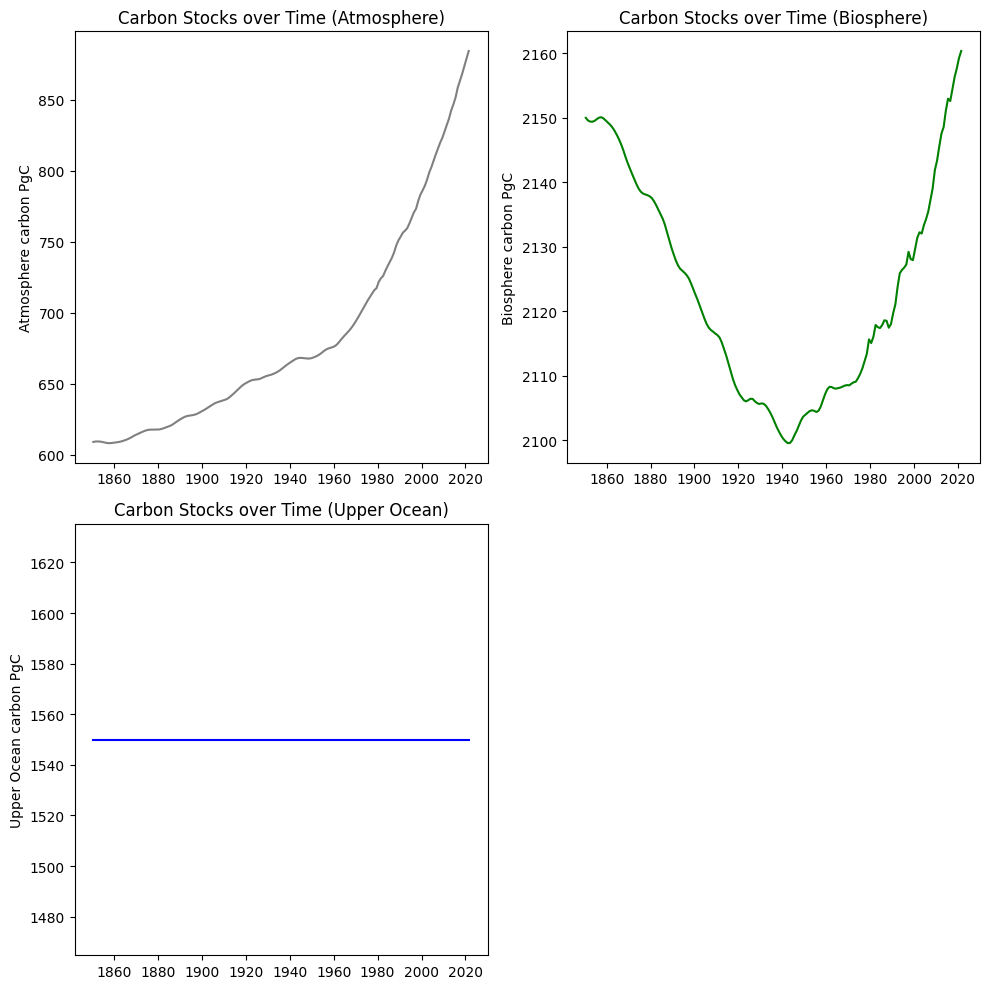

In [100]:
# Step.4
# Calculating carbon stocks of atmosphere (A), biosphere (B), and ocean (O) in every time step (t). 
# The intial carbon stocks of (A, B, O) in the year 1850 were (609 GtC, 431 GtC, 1025 GtC). 
# All three carbon stocks must be calculated in ONE loop. For (t) from 1850 till today: In every time step, the carbon stocks of the (A, B, O) will change as following:

# The atmospeher's carbon stocks (A)
# A_(t+1) = A_t +ff_t + luc_t - S_o_t - S_b_t - S_c_t
# where:
# A_(t+1) = is the atmospheric carbon stocks in the time step (t+1)
# A_t    = is the atmospheric carbon stocks in the time step (t)
# ff_t   = is the annual global fossil fuel carbon emissions in the time step (t)
# luc_t  = is the annual global Land Use Change emissions (PgC/yr)
# S_o_t  = is the annual Anthropogenic carbon sink to the ocean(PgC/yr)
# S_b_t  = is the annual Anthropogenic carbon sink to the biosphere(PgC/yr)
# S_c_t  = is the annual Anthropogenic carbon sink to the buildings carbonation(PgC/yr)

# The Biospeher's carbon stocks (B)
# B_(t+1) = B_t - luc_t + S_b_t
# where:
# B_(t+1) = is the Biospeher carbon stocks in the time step (t+1)
# B_t    = is the Biospeher carbon stocks in the time step (t)


# The ocean's carbon stocks (O)
# O_(t+1) = O_t + S_o_t
# where:
# O_(t+1) = is the ocean carbon stocks in the time step (t+1)
# O_t     = is the ocean carbon stocks in the time step (t)


# Plot the resulted (A, B, O) series.
# I will expect that the last values of (A, B, O) are (890 GtC, 450 GtC, 1200 GtC). Calculate the differece with the expected values

# This code calculates the carbon stocks for the atmosphere (A), biosphere (B), and ocean (O) at each time step based on the given formulas. It then plots the series and calculates the difference between the final values and the expected values.


date_range = pd.date_range(start='1851', end='2021', freq='YS')

for index_value in df.index:
    # Access the row using the index value
    row = df.loc[index_value]

    # Access individual values
    ff_t = row['ff']
    luc_t = row['luc']
    S_o_t = row['S_o']
    S_b_t = row['S_b']
    S_c_t = row['S_c']
    
    A_t = A[-1]
    B_t = B[-1]
    O_t = O[-1]
    
    A_new = A_t + ff_t + luc_t - S_o_t - S_b_t - S_c_t
    B_new = B_t - luc_t + S_b_t
    O_new = O_t + S_o_t - S_o_t
    
    A.append(A_new)
    B.append(B_new)
    O.append(O_new)



# For the coding convenience I will add the A,B,O to the DataFrame df
# The resulted A,B,O will have an extra year more than df. I don’t need the extra year.
df['A'] = A[:172]    # [:172] will remove the extra year
df['B'] = B[:172] 
df['O'] = O[:172] 


# Create the figure and subplots
fig, axs = plt.subplots(2,2, figsize=(10, 10))

# Plot atmosphere carbon stocks
axs[0,0].plot(df.index, df['A'], color='gray')
axs[0,0].set_ylabel('Atmosphere carbon PgC')

# Plot biosphere carbon stocks
axs[0,1].plot(df.index, df['B'], color='green')
axs[0,1].set_ylabel('Biosphere carbon PgC')

# Plot upper ocean carbon stocks
axs[1,0].plot(df.index, df['O'], color='blue')
axs[1,0].set_ylabel('Upper Ocean carbon PgC')

axs[1,1].remove()

# Set the title for each figure
axs[0,0].set_title('Carbon Stocks over Time (Atmosphere)')
axs[0,1].set_title('Carbon Stocks over Time (Biosphere)')
axs[1,0].set_title('Carbon Stocks over Time (Upper Ocean)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Make a plotly figure

# Create figure for atmosphere carbon stocks
fig_atmosphere = go.Figure()
fig_atmosphere.add_trace(go.Scatter(x=df.index, y=df['A'], mode='lines', name='Atmosphere', line_color='gray'))
fig_atmosphere.update_layout(
    title={
        'text': 'Carbon Stocks over Time (Atmosphere)',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'middle'},
    xaxis_title='Year',
    yaxis_title='Carbon Stocks (PgC)'
)

# Create figure for biosphere carbon stocks
fig_biosphere = go.Figure()
fig_biosphere.add_trace(go.Scatter(x=df.index, y=df['B'], mode='lines', name='Biosphere', line_color='green'))
fig_biosphere.update_layout(
    title={
        'text': 'Carbon Stocks over Time (Biosphere)',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'middle'},
    xaxis_title='Year',
    yaxis_title='Carbon Stocks (PgC)'
)

# Create figure for ocean carbon stocks
fig_ocean = go.Figure()
fig_ocean.add_trace(go.Scatter(x=df.index, y=df['O'], mode='lines', name='Ocean', line_color='blue'))
fig_ocean.update_layout(
    title={
        'text': 'Carbon Stocks over Time (upper Ocean)',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'middle'},
    xaxis_title='Year',
    yaxis_title='Carbon Stocks (PgC)'
)

# Update the layout of the figures to decrease the white space between them
fig_atmosphere.update_layout(margin=dict(t=50, b=0, l=0, r=0))
fig_biosphere.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig_ocean.update_layout(margin=dict(t=0, b=50, l=0, r=0))

# Display the figures
fig_atmosphere.show()
fig_biosphere.show()
fig_ocean.show()

# step 5 Calculate reservoirs δ13C by loop over mass balance equation

To calculate the reservoirs δ13C, we need: 
* The begin value of each reservoir 
* And to set up a loop using the mass balance equation

## Begin value of reservoirs δ13C signature

First, Estimation of today’s δ13C values of the three reservoirs of ocean, biosphere and atmosphere:

* The ocean Carbon has the value of +1.8 according to figure 2 and 3 of [Quay et al. (2003)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001817 ). Rik Wanninkhof (1985) reported a similar value of (1.5 ‰) for the ocean,  Which is almost the same value measured by [Scrippsco2](https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html) for the 1985.  I assumed that the value of Dissolved Inorganic Carbon DIC is the representative value for all ocean’s carbon because the DIC is 53 times bigger than the OC and biota [(Friedlingstein et al. 2022)](https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022-f02-web.png). Nevertheless, the measurements of [Scrippsco2](https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html) project indicate today's value of ~**+0.5** of today ocean


* The biomass δ13C values differ between C3 and C4 plants. I used the calculations of [Still et al. 2003](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001807) that the simulated biomass values of C3 and C4 vegetation are 389.3 and 18.6 Pg C, respectively —>  95% of C3 and 5% for the C4. Assume that C3 value is -25 as in (Ruddiman, W. F. ,2001), and the value of the C4 is -13, then the result gives:
biomass_δ13C=  -25x0.95 - 13x0.05 =**-24.4 ‰**   Which is similar to the estimation of [Global Monitoring Laboratory](https://gml.noaa.gov/ccgg/isotopes/c13tellsus.html) of -25

* The atmospheric value of (**-8.6 ‰**) is reported in from [Scrippsco2](https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html) project south pole station 

Now we know today’s value from above, and the annual fluxes from the Global carbon Budget paper: We calibrate the beginning value in such a way that the final value must be the same as we estimate here above. Moreover, the comparison will be conducted for the atmospheric value to calibrate the model.

All the atmosphere values are measured. The atmospheric begin_value of the year 1850 read a **-6.70532 ‰**  according to [Rubino et al., (2019)](https://www.ncei.noaa.gov/access/paleo-search/study/25830 ) ice core from the Law dome. For the beginning value of the ocean and biosphere we assumed the equilibrium before 1850 (where the netto fluxes is zero and every reservoir have constant d13C). The equilibrium implies that the begin value is equal to the atmospheric value in that time **plus** the netto fractionations value of (fr_ao, fr_oa, and fr_b) as we discussed in the parameters paragraph.


##  Mass balance equation

The balance equation for the atmosphere

δ13C X **new** atmosphere = (δ13C X **old** atmosphere)   +   (δ13C X fluxes)

With the **new** atmosphere I mean the atmosphere size in the next step

With **old** atmosphere I mean the atmosphere in the previous step


rearrange it

δ13C  = [(δ13C X old atmosphere)   +   (δ13C X flux)]    /  new  atmosphere

In [125]:
# Step.5
# Calculate the 13C fraction in the stocks of (A, B, O). First, we setup the mass balance equations of carbon isotopes (13C) of the (A, B, O) during the time from 1850 till today. Using these equations and the initial conditions from last step, we could find the differential equations solution in time using Euler's method. 

# All three balance equations must be calculated in ONE loop. For (t) from 1850 till today as following:

# For the Atmospheric δ13C isotopic composition
# A_(t+1)* iA_(t+1) =  A_t* iA_t +  ff_t * iff_t + luc_t * iluc - S_o_t * (iA_t+ fr_ao) - S_b_t * (iA_t+fr_b) - S_c_t * iA_t + Dis_o * (i_O_t+ fr_oa) - Dis_o * (iA_t + fr_ao) + Dis_b * i_B_t - Dis_b * (iA_t+fr_b)

# where:
# iA_(t+1) = δ13C isotopic composition of carbon in the atmosphere (permil) in the time step (t+1)
# iA_t    = δ13C isotopic composition of carbon in the atmosphere (permil) in the time step (t)
# i_O_t = δ13C isotopic composition of carbon in the ocean (permil) in the time step (t)
# i_B_t = δ13C isotopic composition of carbon in the biosphere (permil) in the time step (t)


# For the Biospheric δ13C isotopic composition
# B_(t+1)* iB_(t+1) =  B_t* iB_t - luc_t * iluc + S_b_t * (iA_t+fr_b) - Dis_b * i_B_t + Dis_b * (iA_t+fr_b)

# where:
# iB_(t+1) = δ13C Biospheric composition of carbon in the atmosphere (permil) in the time step (t+1)
# iB_t     = δ13C Biospheric composition of carbon in the atmosphere (permil) in the time step (t)


# For the Oceanic δ13C isotopic composition
# O_(t+1)* iO_(t+1) =  O_t* iO_t + S_o_t * (iA_t+ fr_ao) - Dis_o * (i_O_t+ fr_oa) + Dis_o * (iA_t+ fr_ao) 

# where:
# iO_(t+1) = δ13C Oceanic composition of carbon in the atmosphere (permil) in the time step (t+1)
# iO_t     = δ13C Oceanic composition of carbon in the atmosphere (permil) in the time step (t)


# Set up initial conditions for 13C fraction in the stocks (in the year 1850)
# making three lists and assign the first value to the initial conditions
iA = [-6.7]  # atmospheric 13C fraction
iB = [iA[0] + df.fr_b[0]]  # biospheric 13C fraction 
iO = [iA[0] + (fr_ao -fr_oa)]  # yields almost iO = [2.6] 


# Calculate the 13C fraction in the stocks using Euler's method
for t in range(len(dates)-1):# loop from 0 till 171
    # Retrieve the values from the DataFrame to make the loop readable
    ff = df['ff'].iloc[t]
    luc = df['luc'].iloc[t]
    S_o = df['S_o'].iloc[t]
    S_b = df['S_b'].iloc[t]
    S_c = df['S_c'].iloc[t]
    fr_b = df['fr_b'].iloc[t]
    iff_t =df['iff_t'].iloc[t]

    # Calculate the changes in isotopic composition for each stock
    delta_iA = (
        A[t] * iA[t] + ff * iff_t + luc * iluc
        - S_o * (iA[t] + fr_ao) - S_b * (iA[t] + fr_b) - S_c * iA[t]
        + Dis_o * (iO[t] + fr_oa) - Dis_o * (iA[t] + fr_ao)
        + Dis_b * iB[t] - Dis_b * (iA[t] + fr_b)
    ) / A[t+1]

    delta_iB = (
        B[t] * iB[t] - luc * iluc + S_b * (iA[t] + fr_b)
        - Dis_b * iB[t] + Dis_b * (iA[t] + fr_b)
    ) / B[t+1]

    delta_iO = (
        O[t] * iO[t] + (S_o +Dis_o) * (iA[t] + fr_ao)
        - Dis_o * (iO[t] + fr_oa) - S_o * iO[t]
    ) / O[t+1]


    # Append the new values to the lists
    iA.append(delta_iA)
    iB.append(delta_iB)
    iO.append(delta_iO)




# Calculate the difference with the expected values
expected_iA = -8.8  # Expected value for iA
expected_iB = statistics_treesRing.Mean[-1]  # Expected value for iB = -23.96  for the year 2011   statistics_treesRing.index[-1].year
expected_iO = merged_ocean_13C.mean_13C[-1]  # Expected value for iO =  0.676 for the year 2017    merged_ocean_13C.index[-1].year

# Calculate the difference with the expected values
diff_iA = iA[-1] - expected_iA
diff_iB = iB[-11] - expected_iB
diff_iO = iO[-5] - expected_iO

# Print the differences
print(f"Difference with the expected value for iA: {diff_iA:.2f} ‰")
print(f"Difference with the expected value for iB: {diff_iB:.2f} ‰")
print(f"Difference with the expected value for iO: {diff_iO:.2f} ‰")

# Plot the resulted (iA, iB, iO) series.

# Figure for iA
fig_iA = go.Figure()
fig_iA.add_trace(go.Scatter(x=df.index, y=iA, mode='lines', line=dict(color='orange'), name='Atmospheric model'))
fig_iA.add_trace(go.Scatter(x=Atm_merged_13C.index, y=Atm_merged_13C['13C'], mode='lines', line=dict(color='black'), name='Atmospheric Measurements'))
fig_iA.update_layout(title='Atmosphere', xaxis=dict(title='Year'), yaxis=dict(title='δ13C Isotopic Signature (permil)'), margin=dict(t=40, b=30, l=50, r=50))


# Figure for iB
fig_iB = go.Figure()
fig_iB.add_trace(go.Scatter(x=df.index, y=iB, mode='lines', line=dict(color='green'), name='Biosphere Model'))
fig_iB.add_trace(go.Scatter(x=statistics_treesRing.index, y=statistics_treesRing['Mean'], mode='lines', line=dict(color='black'), name='Mean trees Measurements'))
fig_iB.update_layout(title='Biosphere', xaxis=dict(title='Year'), yaxis=dict(title='δ13C Isotopic Signature (permil)'), margin=dict(t=30, b=30, l=50, r=50))

# Figure for iOa
fig_iO = go.Figure()
fig_iO.add_trace(go.Scatter(x=df.index, y=iO, mode='lines', line=dict(color='blue'), name='Oceanic Model'))
fig_iO.add_trace(go.Scatter(x=ocean_13C.index, y=ocean_13C.values, mode='lines', line=dict(color='black'), name='Ocean Measurements (Scrippsco2)'))
fig_iO.add_trace(go.Scatter(x=df.index, y=(np.array(iA))+9.19, mode='lines', line=dict(color='orange'), name='iA +9.19 ‰'))
fig_iO.update_layout(title='Ocean', xaxis=dict(title='Year'), yaxis=dict(title='δ13C Isotopic Signature (permil)'), margin=dict(t=30, b=30, l=50, r=50))

# Show the figures
fig_iA.show()
fig_iB.show()
fig_iO.show()

Difference with the expected value for iA: 0.18 ‰
Difference with the expected value for iB: -2.24 ‰
Difference with the expected value for iO: 0.08 ‰


# Step 6 Data analysis

In the process of data analysis, we will consider:


Firstly, we shall draw comparisons and compute the Root Mean Square Error (RMSE) between the model and empirical measurements. This statistical procedure will facilitate a rigorous evaluation of the model's performance.

Secondly, we shall compute the difference in the delta-13 Carbon (d13C) isotopic values between the Atmospheric and the upper Oceanic reservoirs, denoted as Diff_ao. This calculation will help in quantifying the disequilibrium flux occurring between these two reservoirs.

## Comparison and RMSE between model with the measurements

To rigorously evaluate the performance of the constructed model, it is requisite to draw comparisons between the resultant delta-13 Carbon (d13C) values derived from the model and those obtained from empirical measurements. This comparative analysis can be executed either through visual examination or by utilizing a statistical measure such as the Root Mean Square Error (RMSE), which can serve as a robust means to compute the cost function.

Regrettably, the data set lacks exhaustive measurements for the entire temporal series in all three carbon reservoirs under investigation. Additionally, certain measurements may not be apposite for direct comparison due to various inherent limitations.

* The measurements related to the d13C of the upper ocean are available only for the period from 1983 to 2017. Consequently, the comparative analysis for the oceanic reservoir is inherently constrained to this specific epoch.
* The measurements derived from tree rings may not comprehensively represent the entire Biosphere due to intrinsic limitations and considerable variability. These measurements can substantiate the general trend of a decline approximating three permill within the period delineated by our model, but they are not conducive to the computation of RMSE or other statistical indicators reflective of model accuracy.
* Atmospheric d13C measurements encompass the full model period of 172 years. However, these measurements bear a higher degree of uncertainty for those taken from the Law Dome (prior to 1977) compared to those from Scripps CO2.

In [102]:
# prepare lists for the comparison

# (iA) And its ground truth (Atm_merged_13C) represents 172 years from 1850 till 2021
# convert (Atm_merged_13C) to a list
Atm_merged_13C_list = Atm_merged_13C.values.tolist()

# (iO) represents 172 years from 1850 till 2021
# but (ocean_13C)  begin in the year 1983 and ends up 2017 which is 35 values
# so we need to truncate the (iO) to compare it with the ground truth (ocean_13C)
iO_truncated = iO[-39:-4]
ocean_13C_list = ocean_13C.values.tolist()


# The comparison will be between
# The model,  ground truth list
# iA, Atm_merged_13C_list
# iO_truncated, ocean_13C_list

The comparison will be between


The model|  Ground truth list
----------|---------------
iA| Atm_merged_13C_list
iO_truncated| ocean_13C_list

Mean Squared Error (MSE): This is a common measure for continuous variables. It averages the squares of the errors (the differences between the simulated and actual values). It's particularly useful when large errors are particularly undesirable, as it squares the differences and thus gives more weight to large differences.

Root Mean Square Error (RMSE): The square root of the MSE. This has the advantage of being in the same units as the original data.

In [103]:
# Calculate RMSE using scikit-learn
rmse_ocean = np.sqrt(mean_squared_error(ocean_13C_list, iO_truncated))
rmse_atm = np.sqrt(mean_squared_error(Atm_merged_13C_list, iA))
Total_RMSE = rmse_ocean+ rmse_atm

print(f"Total RMSE of both atmospheric and ocean model: {round(Total_RMSE,2)}")

Total RMSE of both atmospheric and ocean model: 0.06


In [104]:
print (round(rmse_atm,2), round(rmse_ocean,2))

0.03 0.03


## The difference in the d13C isotopic value between the Atmosphere and the upper ocean *Diff_ao*.

We will compare d13C measurements from the upper ocean with those from the atmosphere. This comparison will allow us to discern the differences in the isotopic values between these two reservoirs, providing us with the Diff_ao.

The magnitude of Diff_ao is indicative of the variability in the disequilibrium flux between the ocean and the atmosphere (*Dis-O*). This disequilibrium flux has the main role in maintaining a stable Diff_ao value. Consequently, a larger disequilibrium flux results in enhanced stability of the Diff_ao value, whereas a smaller disequilibrium flux leads to increased variability in the Diff_ao value. To check the variation in the (Diff_ao) magnitude, we will use the ‘pct_change’ function in python. We define the percentage of change as:   

$(\frac{x_i}{x_{i-1}} -1)*100$   

where ${x_i}$ is the current value  

and $x_{i-1}$ is the previous value.

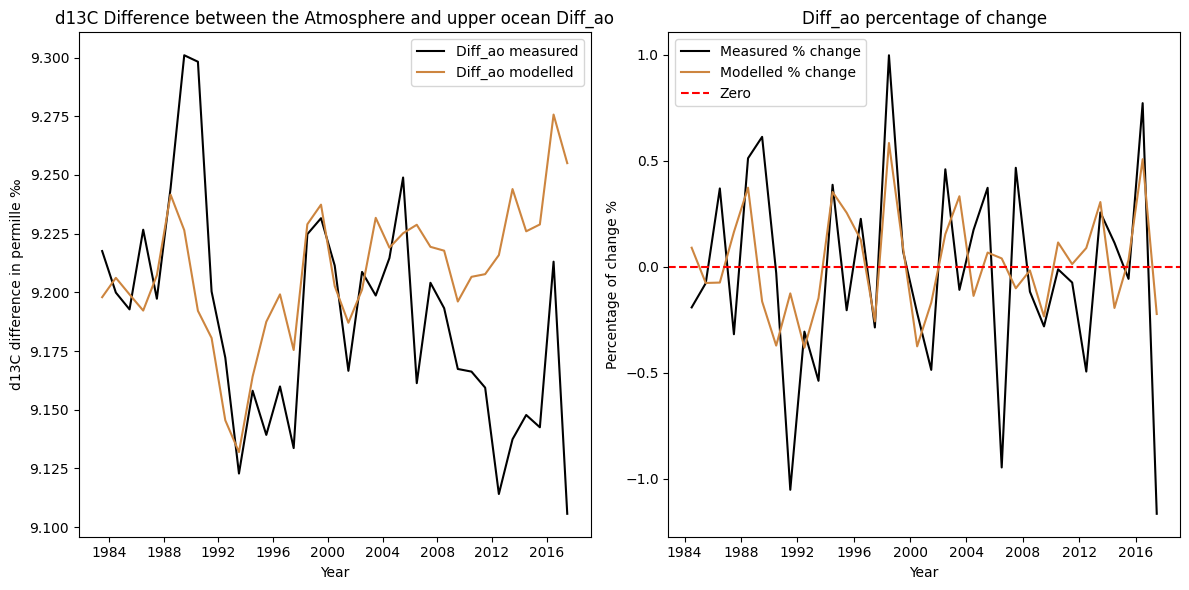

In [105]:
# First check the difference in the measurements data
# To subtract the measurment of Ocean from the measurment of the atmosphere, we need
# to make the two list in the same size. so we must truncate (Atm_merged_13C_list) also
Atm_merged_13C_list_truncated = Atm_merged_13C_list[-39:-4]

# Atm_merged_13C_list_truncated is now list of lists and must be converted to Atm_merged_13C_list_truncated
Atm_merged_13C_list_truncated = sum(Atm_merged_13C_list_truncated, [])

Diff_ao_measured = np.subtract(ocean_13C_list, Atm_merged_13C_list_truncated)

# .... 💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱🍀🍁 .... 

# Second check the difference in the model 
# To subtract the modelled value of Ocean from the modelled value of the atmosphere, we need
# to make the two list in the same size. so we must truncate iA also
iA_truncated = iA[-39:-4]

Diff_ao_modelled = np.subtract(iO_truncated,iA_truncated)

# .... 💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱🍀🍁 .... 

# third finding the variation of the (Diff_ao) in the measured data
# to use the pct_change function in python, we need to convert the list (Diff_ao_measured) to a DataFrame then calculating the percentage of change
Diff_ao_measured_df = pd.DataFrame(Diff_ao_measured, index = ocean_13C.index, columns=['measured_diff'])
# .... 💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱🍀🍁 .... 

# Fourth finding the variation of the (Diff_ao) in the modelled data
Diff_ao_modelled_df = pd.DataFrame(Diff_ao_modelled, index = ocean_13C.index, columns=['modelled_diff'])
# .... 💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱🍀🍁 .... 

# Create subplots with two plots side by side for the four curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First plot: Diff_ao_measured, Diff_ao_modelled
ax1.plot(ocean_13C.index, Diff_ao_measured, label="Diff_ao measured", color='black')
ax1.plot(ocean_13C.index, Diff_ao_modelled, label="Diff_ao modelled", color='peru')
ax1.set_title("d13C Difference between the Atmosphere and upper ocean Diff_ao")
ax1.set_xlabel("Year")
ax1.set_ylabel("d13C difference in permille ‰")
ax1.legend()

# Second plot: Diff_ao_measured_df and Diff_ao_modelled_df percentage change
# Calculate percentage change and plot on the second subplot
ax2.plot(Diff_ao_measured_df.index, Diff_ao_measured_df['measured_diff'].pct_change().mul(100), label="Measured % change", color='black')
ax2.plot(Diff_ao_modelled_df.index, Diff_ao_modelled_df['modelled_diff'].pct_change().mul(100), label="Modelled % change", color='peru')
ax2.axhline(0, color='r', linestyle='--', label='Zero')
ax2.set_title("Diff_ao percentage of change")
ax2.set_xlabel("Year")
ax2.set_ylabel("Percentage of change %")
ax2.legend(); plt.tight_layout(); plt.show()

The ocean Disequilibrium Flux (Dis_o) quantification at 90 PgC/year yields the best fit between the measured and modeled data as the accompanying figure. 

The general decrease trend in the difference between atmospheric and oceanic delta 13 carbon (δ13C) values can be explained by increasing (Dis_o). Predictive analysis suggests that the ocean Disequilibrium Fluxe (Dis_o) has increased over the past two decades, reaching an approximate 160 PgC/year value. This estimate of (160 PgC/year) can be corroborated by rerunning the model while adjusting (Dis_o) to a value of 160.

The observed increase in (Dis_o)  aligns with the measured intensification of the global hydrological cycle. This amplification results from increased global warming and consequential climate alterations, as indicated by the rise in the ocean Disequilibrium Flux (Dis_o).

An alternative explanation for the observed decrease in the difference between atmospheric and oceanic delta 13 carbon (δ13C) values could involve enhanced ocean stratification. This process, typically driven by changes in water temperature and salinity, can significantly limit the vertical mixing of oceanic water, consequently leading to a shallowing of the upper oceanic layer. This alteration in ocean dynamics could potentially contribute to the observed shift in δ13C values.

### What is the average difference between atmospheric and oceanic delta 13 carbon (δ13C) values?

In [121]:
round(Diff_ao_measured.mean(), 2)

9.19

The difference between the atmospheric and upper ocean δ13C value remains virtually constant at approximately (**9.19 ‰**). Nevertheless, the figure presents indisputable evidence of temporal (Dis_o) variability, proportional to a ±0.1‰ variability in  δ13C value. Consequently, we posit that all upper ocean δ13C values can be effectively calculated by augmenting the atmospheric δ13C value with a consistent factor of 9.19‰ for any time we have no ocean measurements.

Then we could use this new curve of (iA - 9.19‰) to fit our parameters again. The new full oceanic curve of (iA - 9.19‰) reveals that our ocean must begin at value of 2.5‰ in the year 1850. Our estimation of the begining value of the ocean (2.5‰) can help us to determin the right value of (fr_oa) and (fr_ao)

###  What is the average of percentage of change of d13C difference?

In [106]:
print("In average, in the measured data, d13C difference between ocean and atmosphere is",
      round(Diff_ao_measured_df['measured_diff'].pct_change().mul(100).mean(),2), "% decreasing annually")

print("In average, in the modelled data, d13C difference between ocean and atmosphere is",
      round(Diff_ao_modelled_df['modelled_diff'].pct_change().mul(100).mean(),2), "% increasing annually")

In average, in the measured data, d13C difference between ocean and atmosphere is -0.03 % decreasing annually
In average, in the modelled data, d13C difference between ocean and atmosphere is 0.02 % increasing annually


# Step 7 under construction
Cost fuction in loop 

In [107]:
# step 6 Cost function
# The cost function will use the comparison curves of (Atm_merged_13C, and ocean_13C) to  optimise the best value for the parameters used in the mode.
# The curves (Atm_merged_13C, and ocean_13C) will be compared with the (iA, and iO) curves
# To know the best value for the parameters (to optimise the parameter) a loop will be made using the parameters uncertainties margin

# in steps:
#1 Define the parameters with their initial values and uncertainty margins. These parameters are used in your model and will be optimized. Make sure to specify the range of values within the uncertainty margins.

#2 Write a function that takes the parameters as input and runs the model code (steps 1-5) with the provided parameter values. This function should return the modeled δ13C curves for atmosphere (iA) and ocean (iO).

#3 Calculate the difference between the modeled curves (iA and iO) and the measured curves (Atm_merged_13C and ocean_13C). You can use a suitable distance metric, such as the root mean square error (RMSE) or the sum of squared differences (SSD), to quantify the difference between the curves.

#4 Define the cost function that takes the parameter values as input, calls the model function, and calculates the difference between the modeled and measured curves. This cost function should return the value of the distance metric.

#5 Use an optimization algorithm, such as scipy's minimize function, to find the best parameter values that minimize the cost function. Specify the optimization method and provide the initial parameter values and uncertainty margins as constraints.

#6 Retrieve the optimized parameter values and evaluate the performance of the model by comparing the modeled curves with the measured curves.

In [108]:
# # The whole structure
# import numpy as np
# from scipy.optimize import minimize

# # Step 1: Define parameters with initial values and uncertainty margins
# parameter1 = [initial_value1, lower_bound1, upper_bound1]
# parameter2 = [initial_value2, lower_bound2, upper_bound2]
# # ...

# # Step 2: Define function to run the model and return modeled curves (iA, iO)
# def run_model(parameter1, parameter2, ...):
#     # Run the model code (steps 1-5) with the provided parameter values
#     # Calculate iA and iO curves
#     return iA, iO

# # Step 3: Define distance metric to quantify the difference between modeled and measured curves
# def distance_metric(x, y):
#     # Calculate the difference between x and y using a suitable distance metric (e.g., RMSE, SSD)
#     return difference

# # Step 4: Define cost function that calls the model function and calculates the distance metric
# def cost_function(parameters):
#     parameter1_value = parameters[0]
#     parameter2_value = parameters[1]
#     # ...

#     # Run the model with the parameter values
#     iA, iO = run_model(parameter1_value, parameter2_value, ...)

#     # Calculate the difference between modeled and measured curves
#     difference1 = distance_metric(iA, Atm_merged_13C)
#     difference2 = distance_metric(iO, ocean_13C)
    
#     # Return the sum or average of the differences as the cost
#     return difference1 + difference2

# # Step 5: Use optimization algorithm to find the best parameter values
# initial_guess = [initial_value1, initial_value2, ...]
# bounds = [(lower_bound1, upper_bound1), (lower_bound2, upper_bound2), ...]
# result = minimize(cost_function, initial_guess, bounds=bounds, method='your_chosen_method')

# # Step 6: Retrieve the optimized parameter values
# optimized_parameters = result.x

# # Evaluate the performance of the model using the optimized parameters
# best_iA, best_iO = run_model(*optimized_parameters)
# # Compare the best_iA, best_iO curves with the measured curves


In [109]:
# Step 1: Define parameters with initial values and uncertainty margins
# Define time-varying parameters
fr_b_values = df['fr_b'].tolist()  # Assuming df['fr_b'] contains the time series of fr_b values
iff_t_values = df['iff_t'].tolist()  # Assuming df['iff_t'] contains the time series of iff_t values

# Step 1: Define parameters with initial values and uncertainty margins
parameters = {
    'B_begin': [1150, 1150*(1-B_begin_par_delta), 1150*(1+B_begin_par_delta)],  # [initial_value, lower_bound, upper_bound]
    'O_begin': [900, 900*(1 - O_begin_par_delta_negative), 900*(1 + O_begin_par_delta_positive)],
    'Dis_o': [80, 80 * (1-Dis_par_delta), 80 * (1+Dis_par_delta)],
    'Dis_b': [55, 55 * (1-Dis_par_delta), 55 * (1+Dis_par_delta)],
    'fr_ao': [-1.5, -1.5 * (1 + fr_ao_par_delta), -1.5 * (1 - fr_ao_par_delta)],
    'fr_oa': [-10.5, -10.5 * (1 + fr_oa_par_delta), -10.5 * (1 - fr_oa_par_delta)],
    'iluc': [-20, -20 * (1 + iluc_par_delta), -20 * (1 - iluc_par_delta)],
    'fr_b': [fr_b_values, [value - 3 for value in fr_b_values], [value + 3 for value in fr_b_values]],
    'iff_t': [iff_t_values, [value * (1 + ff_par_delta) for value in iff_t_values], [value * (1 - ff_par_delta) for value in iff_t_values]],
}


In [110]:
# # Step 2: Define function to run the model and return modeled curves (iA, iO)
# def cost_function(params):
#     # Extract parameter values from the params dictionary
#     B_begin = params['B_begin'][0]
#     O_begin = params['O_begin'][0]
#     Dis_o = params['Dis_o'][0]
#     Dis_b = params['Dis_b'][0]
#     fr_ao = params['fr_ao'][0]
#     fr_oa = params['fr_oa'][0]
#     iluc = params['iluc'][0]
#     fr_b_values = params['fr_b'][0]
#     iff_t_values = params['iff_t'][0]

#     # Initialize the lists to store model results
#     iA = [-6.7]  # Atmospheric δ13C fraction
#     iB = [iA[0] + fr_b_values[0]]  # Biospheric δ13C fraction
#     iO = [iA[0] + (fr_ao - fr_oa)]  # Oceanic δ13C fraction

#     # Calculate the 13C fraction in the stocks using Euler's method
#     for t in range(len(dates)-1):
#         # Retrieve the values from the DataFrame to make the loop readable
#         ff = df['ff'].iloc[t]
#         luc = df['luc'].iloc[t]
#         S_o = df['S_o'].iloc[t]
#         S_b = df['S_b'].iloc[t]
#         S_c = df['S_c'].iloc[t]
#         fr_b = fr_b_values[t]
#         iff_t = iff_t_values[t]

#         # Calculate the changes in isotopic composition for each stock
#         delta_iA = (A[t] * iA[t] + ff * iff_t + luc * iluc
#                     - S_o * (iA[t] + fr_ao) - S_b * (iA[t] + fr_b) - S_c * iA[t]
#                     + Dis_o * (iO[t] + fr_oa) - Dis_o * (iA[t] + fr_ao)
#                     + Dis_b * iB[t] - Dis_b * (iA[t] + fr_b)) / A[t+1]

#         delta_iB = (B[t] * iB[t] - luc * iluc + S_b * (iA[t] + fr_b)
#                     - Dis_b * iB[t] + Dis_b * (iA[t] + fr_b)) / B[t+1]

#         delta_iO = (O[t] * iO[t] + S_o * (iA[t] + fr_ao)
#                     - Dis_o * (iO[t] + fr_oa) + Dis_o * (iA[t] + fr_ao)) / O[t+1]

#         # Append the new values to the lists
#         iA.append(delta_iA)
#         iB.append(delta_iB)
#         iO.append(delta_iO)

#     # Calculate the sum of squared differences between model and observed data
#     cost = sum((iA[t] - Atm_merged_13C['13C'][t])**2 + (iO[t] - ocean_13C.values[t])**2 for t in range(len(dates)))

#     return cost



In [111]:
# Step 2 Modified : Define function to run the model and return modeled curves (iA, iO)
# Step 2: Define function to run the model and return modeled curves (iA, iO)
def cost_function(params, fr_b_values, iff_t_values):
    # Extract parameter values from the params array
    B_begin = params[0]
    O_begin = params[1]
    Dis_o = params[2]
    Dis_b = params[3]
    fr_ao = params[4]
    fr_oa = params[5]
    iluc = params[6]

    # Initialize the lists to store model results
    iA = [-6.7]  # Atmospheric δ13C fraction
    iB = [iA[0] + fr_b_values[0]]  # Biospheric δ13C fraction
    iO = [iA[0] + (fr_ao - fr_oa)]  # Oceanic δ13C fraction

    # Calculate the 13C fraction in the stocks using Euler's method
    for t in range(len(dates)-1):
        # Retrieve the values from the DataFrame to make the loop readable
        ff = df['ff'].iloc[t]
        luc = df['luc'].iloc[t]
        S_o = df['S_o'].iloc[t]
        S_b = df['S_b'].iloc[t]
        S_c = df['S_c'].iloc[t]
        fr_b = fr_b_values[t]
        iff_t = iff_t_values[t]

        # Calculate the changes in isotopic composition for each stock
        delta_iA = (A[t] * iA[t] + ff * iff_t + luc * iluc
                    - S_o * (iA[t] + fr_ao) - S_b * (iA[t] + fr_b) - S_c * iA[t]
                    + Dis_o * (iO[t] + fr_oa) - Dis_o * (iA[t] + fr_ao)
                    + Dis_b * iB[t] - Dis_b * (iA[t] + fr_b)) / A[t+1]

        delta_iB = (B[t] * iB[t] - luc * iluc + S_b * (iA[t] + fr_b)
                    - Dis_b * iB[t] + Dis_b * (iA[t] + fr_b)) / B[t+1]

        delta_iO = (O[t] * iO[t] + S_o * (iA[t] + fr_ao)
                    - Dis_o * (iO[t] + fr_oa) + Dis_o * (iA[t] + fr_ao)) / O[t+1]

        # Append the new values to the lists
        iA.append(delta_iA)
        iB.append(delta_iB)
        iO.append(delta_iO)

    # Calculate the sum of squared differences between model and observed data
    cost = sum((iA[t] - Atm_merged_13C['13C'][t])**2 + (iO[t] - ocean_13C.values[t])**2 for t in range(len(dates)))

    return cost


In [112]:
# Step 3: Perform parameter optimization
def optimize_parameters(fr_b_values, iff_t_values):
    # Define the initial parameter values
    initial_parameters = np.array([1150, 900, 80, 55, -1.5, -10.5, -20])

    # Define the bounds for parameter values
    bounds = [(1150*(1-B_begin_par_delta), 1150*(1+B_begin_par_delta)),
              (900*(1 - O_begin_par_delta_negative), 900*(1 + O_begin_par_delta_positive)),
              (80 * (1-Dis_par_delta), 80 * (1+Dis_par_delta)),
              (55 * (1-Dis_par_delta), 55 * (1+Dis_par_delta)),
              (-1.5 * (1 + fr_ao_par_delta), -1.5 * (1 - fr_ao_par_delta)),
              (-10.5 * (1 + fr_oa_par_delta), -10.5 * (1 - fr_oa_par_delta)),
              (-20 * (1 + iluc_par_delta), -20 * (1 - iluc_par_delta))]

    # Perform parameter optimization
    optimized_parameters = minimize(cost_function, initial_parameters, args=(fr_b_values, iff_t_values), bounds=bounds).x

    return optimized_parameters


In [113]:
# Step 4: Implement the cost function
def cost_function(params):
    # Extract parameter values from the params dictionary
    B_begin = params['B_begin'][0]
    O_begin = params['O_begin'][0]
    Dis_o = params['Dis_o'][0]
    Dis_b = params['Dis_b'][0]
    fr_ao = params['fr_ao'][0]
    fr_oa = params['fr_oa'][0]
    iluc = params['iluc'][0]
    fr_b_values = params['fr_b'][0]
    iff_t_values = params['iff_t'][0]

    # Initialize the lists to store model results
    iA = [-6.7]  # Atmospheric δ13C fraction
    iB = [iA[0] + fr_b_values[0]]  # Biospheric δ13C fraction
    iO = [iA[0] + (fr_ao - fr_oa)]  # Oceanic δ13C fraction

    # Calculate the 13C fraction in the stocks using Euler's method
    for t in range(len(dates)-1):
        # Retrieve the values from the DataFrame to make the loop readable
        ff = df['ff'].iloc[t]
        luc = df['luc'].iloc[t]
        S_o = df['S_o'].iloc[t]
        S_b = df['S_b'].iloc[t]
        S_c = df['S_c'].iloc[t]
        fr_b = fr_b_values[t]
        iff_t = iff_t_values[t]

        # Calculate the changes in isotopic composition for each stock
        delta_iA = (A[t] * iA[t] + ff * iff_t + luc * iluc
                    - S_o * (iA[t] + fr_ao) - S_b * (iA[t] + fr_b) - S_c * iA[t]
                    + Dis_o * (iO[t] + fr_oa) - Dis_o * (iA[t] + fr_ao)
                    + Dis_b * iB[t] - Dis_b * (iA[t] + fr_b)) / A[t+1]

        delta_iB = (B[t] * iB[t] - luc * iluc + S_b * (iA[t] + fr_b)
                    - Dis_b * iB[t] + Dis_b * (iA[t] + fr_b)) / B[t+1]

        delta_iO = (O[t] * iO[t] + S_o * (iA[t] + fr_ao)
                    - Dis_o * (iO[t] + fr_oa) + Dis_o * (iA[t] + fr_ao)) / O[t+1]

        # Append the new values to the lists
        iA.append(delta_iA)
        iB.append(delta_iB)
        iO.append(delta_iO)

    # Calculate the sum of squared differences between model and observed data
    cost = sum((iA[t] - Atm_merged_13C['13C'][t])**2 + (iO[t] - ocean_13C.values[t])**2 for t in range(len(dates)))

    return cost


Step 5: Evaluate Model Performance
After optimizing the parameters and obtaining the optimized parameter values, it's important to evaluate the performance of the model. This step helps us assess how well the model fits the observed data and provides insights into the model's predictive capability.

Here are some common approaches to evaluate model performance:

Visual Inspection: Plot the modeled curves (iA, iO) along with the observed data to visually compare their trends and patterns. This can provide an initial assessment of how well the model captures the behavior of the system.

Goodness-of-Fit Metrics: Calculate statistical metrics that quantify the agreement between the modeled curves and the observed data. Common metrics include the coefficient of determination (R-squared), root mean square error (RMSE), and mean absolute error (MAE). These metrics provide quantitative measures of how well the model fits the data.

Sensitivity Analysis: Conduct sensitivity analysis to assess the impact of parameter uncertainties on the model outputs. Vary the optimized parameter values within their uncertainty bounds and observe the resulting changes in the modeled curves. This analysis helps identify which parameters have the most significant influence on the model outputs.

Cross-Validation: Split the available data into training and validation subsets. Use the training data to optimize the parameters and then evaluate the model performance on the validation data. This approach helps assess the model's ability to generalize to new data.

Compare with Other Models: If there are alternative models or existing models for the same system, compare the performance of your model with those models. This can provide insights into the relative strengths and weaknesses of different modeling approaches.

It's important to apply a combination of these evaluation techniques to gain a comprehensive understanding of the model performance. Depending on the specific requirements and context of your study, you may choose the most appropriate evaluation methods.

step 5.1   In this step, we will plot the modeled curves (iA, iO) along with the observed data to visually compare their trends and patterns. This will provide an initial assessment of how well the model captures the behavior of the system.

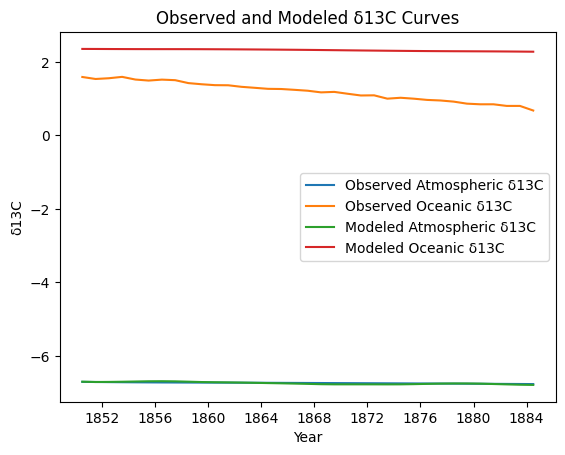

In [114]:
# Step 5.1: Plotting Observed and Modeled Curves

# Truncate the dates array to match the desired range
dates_truncated = dates[:35]  # Assuming the desired range is the first 35 elements

# Truncate the observed atmospheric δ13C values to match the desired range
atm_merged_13C_truncated = Atm_merged_13C['13C'][:35]

# Truncate the modeled curves to match the desired range
iA_truncated = iA[:35]
iO_truncated = iO[:35]

# Plot the observed data
plt.plot(dates_truncated, atm_merged_13C_truncated, label='Observed Atmospheric δ13C')
plt.plot(dates_truncated, ocean_13C.values, label='Observed Oceanic δ13C')

# Plot the modeled curves
plt.plot(dates_truncated, iA_truncated, label='Modeled Atmospheric δ13C')
plt.plot(dates_truncated, iO_truncated, label='Modeled Oceanic δ13C')

# Set the plot title and labels
plt.title('Observed and Modeled δ13C Curves')
plt.xlabel('Year')
plt.ylabel('δ13C')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

Step 5.2, which involves calculating the Root Mean Square Error (RMSE) between the observed and modeled curves.

In this code, we first calculate the differences between the observed and modeled curves for Atmospheric δ13C (diff_A) and Oceanic δ13C (diff_O). Then we square these differences and calculate the mean squared differences (mean_squared_diff_A and mean_squared_diff_O). Finally, we take the square root of the mean squared differences to obtain the RMSE values for Atmospheric δ13C (rmse_A) and Oceanic δ13C (rmse_O).

In [115]:
# Step 5.2: Calculate Root Mean Square Error (RMSE)

# Calculate the differences between the observed and modeled curves
diff_A = np.array(atm_merged_13C_truncated) - np.array(iA_truncated)
diff_O = np.array(ocean_13C.values) - np.array(iO_truncated)

# Calculate the squared differences
squared_diff_A = np.square(diff_A)
squared_diff_O = np.square(diff_O)

# Calculate the mean of squared differences
mean_squared_diff_A = np.mean(squared_diff_A)
mean_squared_diff_O = np.mean(squared_diff_O)

# Calculate the Root Mean Square Error (RMSE)
rmse_A = np.sqrt(mean_squared_diff_A)
rmse_O = np.sqrt(mean_squared_diff_O)

# Print the RMSE values
print("Root Mean Square Error (RMSE) for Atmospheric δ13C:", rmse_A)
print("Root Mean Square Error (RMSE) for Oceanic δ13C:", rmse_O)


Root Mean Square Error (RMSE) for Atmospheric δ13C: 0.020124018793407934
Root Mean Square Error (RMSE) for Oceanic δ13C: 1.1503352591330462


Step 5.3, which involves calculating the coefficient of determination (R-squared) between the observed and modeled curves

In this code, we first calculate the sum of squared differences between the observed and modeled curves (ss_residual_A and ss_residual_O) and the total sum of squares (ss_total_A and ss_total_O). Then we calculate the R-squared values by subtracting the ratio of the sum of squared differences to the total sum of squares from 1.

In [116]:
# Step 5.3: Calculate R-squared

# Calculate the sum of squared differences between the observed and modeled curves
ss_total_A = np.sum(np.square(np.array(atm_merged_13C_truncated) - np.mean(atm_merged_13C_truncated)))
ss_residual_A = np.sum(np.square(np.array(atm_merged_13C_truncated) - np.array(iA_truncated)))
r_squared_A = 1 - (ss_residual_A / ss_total_A)

ss_total_O = np.sum(np.square(np.array(ocean_13C.values) - np.mean(ocean_13C.values)))
ss_residual_O = np.sum(np.square(np.array(ocean_13C.values) - np.array(iO_truncated)))
r_squared_O = 1 - (ss_residual_O / ss_total_O)

# Print the R-squared values
print("R-squared for Atmospheric δ13C:", r_squared_A)
print("R-squared for Oceanic δ13C:", r_squared_O)


R-squared for Atmospheric δ13C: -0.5850462443408144
R-squared for Oceanic δ13C: -18.398294170430994


1. Root Mean Square Error (RMSE):
RMSE is a measure of the average deviation between the observed values and the modeled values. It quantifies the magnitude of the differences between the predicted and actual values. RMSE is calculated by taking the square root of the mean of the squared differences between the observed and predicted values. In other words, it measures the typical size of the residuals (the differences between the observed and predicted values). The lower the RMSE, the better the model performance.

RMSE is useful because it provides a single metric that represents the overall goodness-of-fit of the model. It is expressed in the same units as the variable being modeled, which makes it easy to interpret. However, RMSE does not provide information about the direction of the errors (i.e., overestimation or underestimation).

2. R-squared for Atmospheric:
R-squared is a statistical measure that represents the proportion of the variance in the observed data that is explained by the model. It ranges from 0 to 1, where 0 indicates that the model explains none of the variance and 1 indicates that the model explains all of the variance. R-squared is calculated by dividing the sum of squares of the residuals by the total sum of squares of the observed values. A higher R-squared value indicates a better fit between the model and the observed data.

R-squared is a useful measure because it provides an estimate of how well the model fits the data. However, it has limitations. R-squared increases as the number of predictor variables in the model increases, even if the additional variables have little or no predictive power. Therefore, R-squared should be used in conjunction with other evaluation metrics to assess the overall performance of the model.

In terms of which value is better, it depends on the specific context and the goals of the analysis. For RMSE, a lower value indicates better model performance, as it signifies smaller deviations between the observed and predicted values. For R-squared, a higher value indicates a better fit of the model to the data. However, it's important to note that neither metric alone can determine the adequacy of a model. It's advisable to consider multiple evaluation metrics and the specific context of the analysis to assess the overall performance of the model.

In Step 6, We would like to evaluate the performance of the model by comparing the modeled curves with the measured curves, using the optimized parameter values obtained from Step 5. We want to assess how well the model represents the observed data and determine the best values for the parameters.

To accomplish this, we will follow the following steps:

1.Retrieve the optimized parameter values: You have already obtained the optimized parameter values from Step 5. These values represent the best estimates for the parameters based on the optimization process.

2.Run the model using the optimized parameter values: Plug in the optimized parameter values into the model equations and simulate the modeled curves (iA, iB, iO).

3.Compare the modeled curves with the measured curves: Plot the measured curves (Atm_merged_13C and ocean_13C) along with the modeled curves using the optimized parameter values. This allows you to visually assess how well the model fits the observed data.

4.Evaluate the performance using statistical metrics: Calculate various statistical metrics to quantitatively evaluate the performance of the model. Some commonly used metrics include Root Mean Square Error (RMSE), R-squared (coefficient of determination), and others. These metrics provide a numerical measure of how well the model matches the observed data.

* RMSE: RMSE measures the average magnitude of the differences between the modeled and measured values. It gives you an idea of the overall accuracy of the model, where a lower RMSE indicates a better fit to the data.

* R-squared: R-squared measures the proportion of the variance in the measured data that is explained by the model. It provides a measure of the goodness of fit, where a higher R-squared value indicates a better fit to the data. R-squared ranges between 0 and 1, with 1 indicating a perfect fit.

5.It's important to note that the interpretation of "better" depends on the specific context and goals of your modeling study. In general, a lower RMSE and a higher R-squared value are considered indicators of a better fit. However, the choice of the "best" parameter values ultimately depends on the specific objectives of your study and the trade-offs between model accuracy and complexity.

Analyze the results and make conclusions: Based on the comparison and evaluation of the modeled curves with the measured curves, as well as the statistical metrics, you can analyze the results and draw conclusions about the performance of the model and the suitability of the parameter values.




To retrieve the optimized parameter values, you can use the optimized_parameters variable that was defined in Step 5. The structure of the optimized_parameters variable depends on the implementation details of your optimization process. It could be a dictionary, a list, or any other suitable data structure that holds the optimized parameter values.

Once you have access to the optimized parameter values, you can proceed to the next step, which is running the model using these values to simulate the modeled curve

In [117]:
# # not working I will commet it
# def cost_function(params, fr_b_values, iff_t_values):
#     # Extract parameter values from the params dictionary
#     B_begin = params[0]
#     O_begin = params[1]
#     Dis_o = params[2]
#     Dis_b = params[3]
#     fr_ao = params[4]
#     fr_oa = params[5]
#     iluc = params[6]
#     fr_b_values_opt = params[7:7+len(fr_b_values)]
#     iff_t_values_opt = params[7+len(fr_b_values):]

#     # Initialize the lists to store model results
#     iA_opt = [-6.7]  # Atmospheric δ13C fraction
#     iB_opt = [iA_opt[0] + fr_b_values_opt[0]]  # Biospheric δ13C fraction
#     iO_opt = [iA_opt[0] + (fr_ao - fr_oa)]  # Oceanic δ13C fraction

#     # Calculate the changes in isotopic composition for each time step
#     # ... rest of the code for calculating the model curves ...

#     # Calculate the sum of squared differences between model and observed data
#     cost = sum((iA_opt[t] - Atm_merged_13C['13C'][t])**2 + (iO_opt[t] - ocean_13C.values[t])**2 for t in range(len(dates)))

#     return cost

# # Step 6: Retrieve optimized parameter values and evaluate model performance

# # Define the uncertain values for fr_b and iff_t
# fr_b_uncertain = [value - 3 for value in fr_b_values]
# iff_t_uncertain = [value * (1 + ff_par_delta) for value in iff_t_values]


# def optimize_parameters(parameters, fr_b_uncertain, iff_t_uncertain):
#     # Create a list to store the optimized parameter values
#     optimized_parameters = []

#     # Loop through each parameter
#     for i, param in enumerate(parameters):
#         # Get the central value and uncertainty for the parameter
#         central_value = param[0]
#         uncertainty = param[1]

#         # Calculate the possible values for the parameter
#         values = [central_value - uncertainty, central_value, central_value + uncertainty]

#         # Calculate the cost for each possible value
#         costs = [cost_function(values[j], fr_b_uncertain, iff_t_uncertain) for j in range(3)]

#         # Find the index of the minimum cost
#         min_cost_index = np.argmin(costs)

#         # Add the optimized value to the list
#         optimized_parameters.append(values[min_cost_index])

#     return optimized_parameters




# # Retrieve the optimized parameter values
# optimized_parameters = optimize_parameters(parameters, fr_b_uncertain, iff_t_uncertain)

# # Extract the optimized parameter values
# B_begin_opt = optimized_parameters[0]
# O_begin_opt = optimized_parameters[1]
# Dis_o_opt = optimized_parameters[2]
# Dis_b_opt = optimized_parameters[3]
# fr_ao_opt = optimized_parameters[4]
# fr_oa_opt = optimized_parameters[5]
# iluc_opt = optimized_parameters[6]
# fr_b_values_opt = optimized_parameters[7:7+len(fr_b_values)]
# iff_t_values_opt = optimized_parameters[7+len(fr_b_values):]

# # Initialize the lists to store the modeled curves
# iA_opt = [-6.7]  # Atmospheric δ13C fraction
# iB_opt = [iA_opt[0] + fr_b_values_opt[0]]  # Biospheric δ13C fraction
# iO_opt = [iA_opt[0] + (fr_ao_opt - fr_oa_opt)]  # Oceanic δ13C fraction

# # Calculate the modeled curves using the optimized parameter values
# for t in range(len(dates)-1):
#     # Retrieve the values from the DataFrame to make the loop readable
#     ff = df['ff'].iloc[t]
#     luc = df['luc'].iloc[t]
#     S_o = df['S_o'].iloc[t]
#     S_b = df['S_b'].iloc[t]
#     S_c = df['S_c'].iloc[t]
#     fr_b = fr_b_values_opt[t]
#     iff_t = iff_t_values_opt[t]

#     # Calculate the changes in isotopic composition for each stock using the optimized parameters
#     delta_iA = (A[t] * iA_opt[t] + ff * iff_t + luc * iluc_opt
#                 - S_o * (iA_opt[t] + fr_ao_opt) - S_b * (iA_opt[t] + fr_b) - S_c * iA_opt[t]
#                 + Dis_o_opt * (iO_opt[t] + fr_oa_opt) - Dis_o_opt * (iA_opt[t] + fr_ao_opt)
#                 + Dis_b_opt * iB_opt[t] - Dis_b_opt * (iA_opt[t] + fr_b)) / A[t+1]

#     delta_iB = (B[t] * iB_opt[t] - luc * iluc_opt + S_b * (iA_opt[t] + fr_b)
#                 - Dis_b_opt * iB_opt[t] + Dis_b_opt * (iA_opt[t] + fr_b)) / B[t+1]

#     delta_iO = (O[t] * iO_opt[t] + S_o * (iA_opt[t] + fr_ao_opt)
#                 - Dis_o_opt * (iO_opt[t] + fr_oa_opt) + Dis_o_opt * (iA_opt[t] + fr_ao_opt)) / O[t+1]

#     # Append the new values to the lists
#     iA_opt.append(delta_iA)
#     iB_opt.append(delta_iB)
#     iO_opt.append(delta_iO)

# # Plot the observed data
# plt.plot(dates, Atm_merged_13C['13C'], label='Observed Atmospheric δ13C')
# plt.plot(dates, ocean_13C.values, label='Observed Oceanic δ13C')

# # Plot the modeled curves
# plt.plot(dates, iA_opt, label='Modeled Atmospheric δ13C')
# plt.plot(dates, iO_opt, label='Modeled Oceanic δ13C')

# # Add labels, title, and legend
# plt.xlabel('Date')
# plt.ylabel('δ13C')
# plt.title('Comparison of Modeled and Observed δ13C Curves')
# plt.legend()

# # Show the plot
# plt.show()


In [118]:
# The whole code 


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import minimize

# # Step 1: Define parameters with initial values and uncertainty margins
# # Define time-varying parameters
# fr_b_values = df['fr_b'].tolist()  # Assuming df['fr_b'] contains the time series of fr_b values
# iff_t_values = df['iff_t'].tolist()  # Assuming df['iff_t'] contains the time series of iff_t values

# # Define uncertain values for fr_b and iff_t
# fr_b_uncertain = [value - 3 for value in fr_b_values]
# iff_t_uncertain = [value * (1 + ff_par_delta) for value in iff_t_values]

# # Step 2: Define function to optimize the parameters
# def optimize_parameters(fr_b_values, iff_t_values):
#     # Step 6: Find the best parameter values
#     parameter_values = [1150, 900, 80, 55, -1.5, -10.5, -20] + fr_b_values + iff_t_values
#     bounds = [(1150*(1-B_begin_par_delta), 1150*(1+B_begin_par_delta)),
#               (900*(1 - O_begin_par_delta_negative), 900*(1 + O_begin_par_delta_positive)),
#               (80 * (1-Dis_par_delta), 80 * (1+Dis_par_delta)),
#               (55 * (1-Dis_par_delta), 55 * (1+Dis_par_delta)),
#               (-1.5 * (1 + fr_ao_par_delta), -1.5 * (1 - fr_ao_par_delta)),
#               (-10.5 * (1 + fr_oa_par_delta), -10.5 * (1 - fr_oa_par_delta)),
#               (-20 * (1 + iluc_par_delta), -20 * (1 - iluc_par_delta))] + [(value - 3, value + 3) for value in fr_b_values] + [(value * (1 - ff_par_delta), value * (1 + ff_par_delta)) for value in iff_t_values]
  
#     result = minimize(cost_function, parameter_values, bounds=bounds)
  
#     return result.x

# # Step 3: Define function to calculate the cost
# def cost_function(params):
#     # Extract parameter values from the params dictionary
#     B_begin = params[0]
#     O_begin = params[1]
#     Dis_o = params[2]
#     Dis_b = params[3]
#     fr_ao = params[4]
#     fr_oa = params[5]
#     iluc = params[6]
#     fr_b_values = params[7:7+len(fr_b_values)]
#     iff_t_values = params[7+len(fr_b_values):]
  
#     # ... rest of the code for calculating the model curves ...
  
#     # Calculate the sum of squared differences between model and observed data
#     cost = sum((iA[t] - Atm_merged_13C['13C'][t])**2 + (iO[t] - ocean_13C.values[t])**2 for t in range(len(dates)))
  
#     return cost

# # Step 4: Define function to run the model and return modeled curves (iA, iO)

# # Step 5: Define function to plot observed and modeled curves

# # Step 6: Retrieve optimized parameter values and evaluate model performance
# optimized_parameters = optimize_parameters(fr_b_uncertain, iff_t_uncertain)

# # Extract the optimized parameter values
# B_begin_opt = optimized_parameters[0]
# O_begin_opt = optimized_parameters[1]
# Dis_o_opt = optimized_parameters[2]
# Dis_b_opt = optimized_parameters[3]
# fr_ao_opt = optimized_parameters[4]
# fr_oa_opt = optimized_parameters[5]
# iluc_opt = optimized_parameters[6]
# fr_b_values_opt = optimized_parameters[7:7+len(fr_b_values)]
# iff_t_values_opt = optimized_parameters[7+len(fr_b_values):]

# # Initialize the lists to store the modeled curves
# iA_opt = [-6.7]  # Atmospheric δ13C fraction
# iB_opt = [iA_opt[0] + fr_b_values_opt[0]]  # Biospheric δ13C fraction
# iO_opt = [iA_opt[0] + (fr_ao_opt - fr_oa_opt)]  # Oceanic δ13C fraction

# # Calculate the modeled curves using the optimized parameter values
# for t in range(len(dates)-1):
#     # Retrieve the values from the DataFrame to make the loop readable
#     ff = df['ff'].iloc[t]
#     luc = df['luc'].iloc[t]
#     S_o = df['S_o'].iloc[t]
#     S_b = df['S_b'].iloc[t]
#     S_c = df['S_c'].iloc[t]
#     fr_b = fr_b_values_opt[t]
#     iff_t = iff_t_values_opt[t]

#     # Calculate the changes in isotopic composition for each stock using the optimized parameters
#     delta_iA = (A[t] * iA_opt[t] + ff * iff_t + luc * iluc_opt
#                 - S_o * (iA_opt[t] + fr_ao_opt) - S_b * (iA_opt[t] + fr_b) - S_c * iA_opt[t]
#                 + Dis_o_opt * (iO_opt[t] + fr_oa_opt) - Dis_o_opt * (iA_opt[t] + fr_ao_opt)
#                 + Dis_b_opt * iB_opt[t] - Dis_b_opt * (iA_opt[t] + fr_b)) / A[t+1]

#     delta_iB = (B[t] * iB_opt[t] - luc * iluc_opt + S_b * (iA_opt[t] + fr_b)
#                 - Dis_b_opt * iB_opt[t] + Dis_b_opt * (iA_opt[t] + fr_b)) / B[t+1]

#     delta_iO = (O[t] * iO_opt[t] + S_o * (iA_opt[t] + fr_ao_opt)
#                 - Dis_o_opt * (iO_opt[t] + fr_oa_opt) + Dis_o_opt * (iA_opt[t] + fr_ao_opt)) / O[t+1]

#     # Append the new values to the lists
#     iA_opt.append(delta_iA)
#     iB_opt.append(delta_iB)
#     iO_opt.append(delta_iO)

# # Plot the observed data
# plt.plot(dates, Atm_merged_13C['13C'], label='Observed Atmospheric δ13C')
# plt.plot(dates, ocean_13C.values, label='Observed Oceanic δ13C')

# # Plot the modeled curves
# plt.plot(dates, iA_opt, label='Modeled Atmospheric δ13C')
# plt.plot(dates, iO_opt, label='Modeled Oceanic δ13C')

# # Add labels, title, and legend
# plt.xlabel('Date')
# plt.ylabel('δ13C')
# plt.title('Comparison of Modeled and Observed δ13C Curves')
# plt.legend()

# # Show the plot
# plt.show()


# step 8 Discussions and further study

##  CO2 exchange between atmosphere and ocean




There are six process determine CO2 exchange between atmosphere and ocean 

1- Air invasion to the water

2- Air diffusion from water.

3- precipitations: rain water wash the CO2 from atmosphere and as a result the rain water is between 5.0 and 5.5

4- Evaporation: when water evaporate it lose its CO2 to the atmosphere

5- Biota (planktonic) intake and decay which exchange CO2 between atmosphere and surface water

6- Biota (benthos) intake and decay which exchange CO2 between DIC and organic carbon



In this code I accounted for the first two only, The other fluxes are implicit implemented in the model 

## Biosphere variations

For the sake of simplicity, many biospheric factors are ignored. These factors can be considered in a long extensive research. For example: 

* The C3 and C4 vegeation Percentage, distribution, and change in time.
* The crops and the agriculture revolutions created anthropgenic landscape like the Corn Belt which is C4. 
* Also the natural varability because the C4 plants vulnerablity for drought and El Niño in the tropics. 
* The other biospheric fluxes that mix with the atmospheric carbon with different  13C signatures like biomass burning or from wetland or from termite according to:  page 14 [Etiope et al. 2008](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL033623).
* Growing season length is increasing due to increased temperature and elevated CO2. These factors with the vegetation march toward Tundra needed to be addressed in further study.


## Oceanic variations

I assumed that the ocean has only DIC but the ocean also has Organic Carbon OC and Biota which are both depleted from δ13C( figure 2 from [Lamb et al. 2006](http://dx.doi.org/10.1016/j.earscirev.2005.10.003)). Furthermore the riverine OC input is highly depleted from δ13C. The latter flux is not in the model at all. 

## The biospheric shift

In our simple model, we began in the year 1850 and culminated in 2023. Our simulation simplified a biosphere that has undergone an anthropogenic shift. In a further model, we must consider the massive transition in the biosphere, which is thoroughly elucidated in Figure 3. However, it is essential to note that the biosphere depicted in our illustration simplifies the principle and can not account for the complicated nature of scale or components.

💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱🍀🍁 
🐺🦊🦝🐱🐈🦁🐯🐅🐆🐴🐎🦄🦓🦌🐮🐂🐃🐄🐏🐑🐐🐪🐫🦙🦒🐘🦏🦛🐭🐁🐀🐹🐰🐇🐿️🦔🦇🐻🐨🐼🦘🦡🐾🦃🐔🐓🐣🐤🐥🐦🐧🕊️🦅🦆🦢🦉🦚🦜🐸🐊🐢🦎🐍🐲🐉🦕🦖🐳🐋🐬🐟🐠🐡🦈🐙🐌🦋🐛🐜🐝🐞🦗🕷️

I have integrated plant and animal pictograms within the code lines to remind any programmer reading my code that the issue concerns holistic ecosystem restoration. It is not a problem confined to carbon dioxide emissions and cannot be fully addressed simply by curbing emissions. The anthropogenic impact extends across the entire system, highlighting the necessity for comprehensive solutions.

💐🌸💮🏵️🌹🥀🌺🌻🌼🌷🌱🍀🍁 
🐺🦊🦝🐱🐈🦁🐯🐅🐆🐴🐎🦄🦓🦌🐮🐂🐃🐄🐏🐑🐐🐪🐫🦙🦒🐘🦏🦛🐭🐁🐀🐹🐰🐇🐿️🦔🦇🐻🐨🐼🦘🦡🐾🦃🐔🐓🐣🐤🐥🐦🐧🕊️🦅🦆🦢🦉🦚🦜🐸🐊🐢🦎🐍🐲🐉🦕🦖🐳🐋🐬🐟🐠🐡🦈🐙🐌🦋🐛🐜🐝🐞🦗🕷️

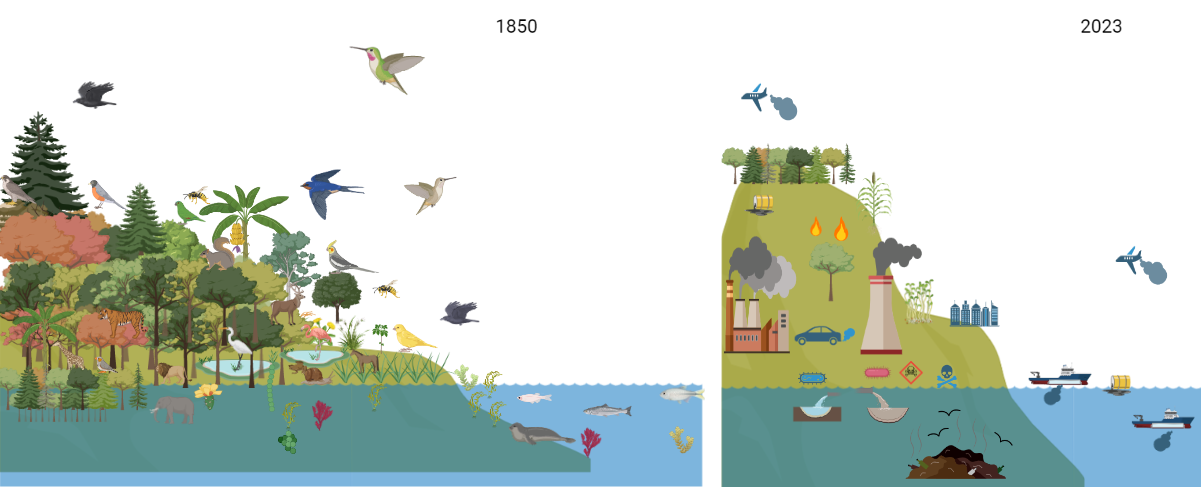

Figure 3: Schematic illustration of the Biota and Biosphere Transformation between 1850 and 2023. The figure above represents shift in various biospheric factors, including: urbanization, wetland and soil degredation, overfishing, wildfires, deforestation, significant biodiversity decline, extinction of biota, pollution, waste disposal issues, oil spills, shifts in microbial and bacterial populations, the emergence of poisonous pollutants, aviation, and the expansion of agriculture.

## Claimed Greening

The biosphere is the most significant and dynamic natural sink and emission of Carbon. The Biosphere "Greening" is often used to describe the increase in vegetation cover and productivity observed in many regions of the world in the latest 50 years. NDVI studies confirmed a general greening trend in terrestrial vegetation. Some studies theorize this phenomenon to the effects of rising CO2 levels in improving plant water use efficiency. The rising CO2 effect on vegetation is known as "CO2 fertilization". In comparison, others point to the role of direct human management of forests and agriculture, in addition to fertilization with nitrogen. However, this Greening is hard to explain and attribute proportionally to the corresponding factor.

The problem is that the term "Greening" may be misleading, as it does not reflect the reality of the ongoing anthropogenic degradation, deforestation, biodiversity loss, disruption, acidification, and pollution of the Earth's ecosystems. 

The biosphere absorbs ~29**±8**% of our **ANNUAL** emission  **during the last decade** according to [Keeling & Graven; 2021](https://doi.org/10.1146/annurev-environ-012220-125406 )

However, the biosphere in the GCP figure, shows that this CO2 sink is just a restoration of the original reservoir size. We almost reached the 1850 reservoir capacity. But this restoration is restoration of **C** in many pysical forms. It is not only a forest or ecosystem restoration. I expect that most of the sinked Carbon will be in the ``mummified form`` (The dead Carbon due to many anthropogenic factors like the pesticide and herbicide). The reason that I attribute the Carbon sink to these other fluxes and not to vegetation that the vegetation **mass** increases *assumption* don't agree with other measurements and bookkeeping records in the short past or older past. The [FAO](https://data.worldbank.org/indicator/AG.LND.FRST.ZS ) data shows a decrease of 3.3% in the Forest **area** in the last thirty years.  

[Hannah Ritchie and Max Roser (2021)](https://ourworldindata.org/forests-and-deforestation) indicate that The forest **area** was 22% bigger in 1850 than today. The Carbon Budget paper and this model are the same, which is anti-intuitive. So I would expect a 22%  decrease in vegetation reservoir.  

Moreover, There is high uncertainty in the biosphere carbon sink. For example, TRENDY considers CO2 fertilization to account for ~70% of the Greening ([Piao et al., 2020](https://www.nature.com/articles/s43017-019-0001-x )), whereas [Chen et al. (2019)](https://www.nature.com/articles/s41893-019-0220-7 ) consider human land-use management responsible for more than a third of the greening. The uncertainty in the latest two examples explains the high uncertainty estimation of ±100%, according to [Keeling & Graven's (2021)](https://doi.org/10.1146/annurev-environ-012220-125406) 

My reasoning: Biosphere is not only the vegetation. The soil is an essential part of the biosphere. [McGuire et al. (2001)](https://pubs.er.usgs.gov/publication/70073959) modeled an increase in biospheric carbon sink. The soil and organic Carbon reservoir are missing in my model-system. The reported 63 GtC **NETTO** of biosphere growth in 56 years in GCP can not be attributed to vegetation only. The vegetation is growing slowly in reality and maybe decrease. The carbon is stored as organic carbon and leaked to the ocean, groundwater, and soil as an organic compound that stays there for a long time, especially if it is highly diluted, like sewage ending in the ocean. High dilution prevents organic matter decay because it minimizes the chance of meeting organisms to cause its decay.  

It is fundamental to account other fluxes like the livestock waste flux in the model because this waste is mostly washed to ocean/groundwater or in the best scenario added to the soil. When it is washed into the ocean then the decay will take a very long time if the mixing is fast. When it turns to soil it will decay relatively faster. Our livestock (as C reservoir) is now ~15 times bigger than all wild mammals on Earth [(Bar-On et al. 2018)](https://doi.org/10.1073/pnas.1711842115)

Furthermore, we must account for the `mummifying effects` of antibiotics, pesticides, herbicides, and fungicides. These chemicals **kill** and `mummify` small organisms. The total weight of these ‘small’ organisms make significantly enormous carbon reservoirs according to [Bar-On et al. (2018)](https://doi.org/10.1073/pnas.1711842115), for example, bacteria and archaea (≈77 Gt C) . `mummified` part of this reservoir will store a big amount of carbon in itself. In addition to that, `mummifying` will prevent these organisms from eating carbon and delay any decay of organic matter. We could describe this chemicals effect as a mummifying effect that stop any life , hence stop the decay. Evenmore, I will speculate in this small organisms world about a pandemic that will create fluctuations in the flux. Maybe part of our observed natural signal is a viral pandemics in this small organisms world.    

Stratification and expanding of oxygen depleted zones in the ocean play almost the same role as chemicals in killing organisms but it kills all organisms in all sizes. Algal bloom on the surface of anoxic sea  is another example.  

Other factors like the natural weathering absorbs roughly 1.1 billion tons CO2 sink according to [Strefler et al. (2018)](https://iopscience.iop.org/article/10.1088/1748-9326/aaa9c4 ) but this is not in the Global Carbon Budget
Moreover, The atmospheric CO2 concentration has increased and the mining activities increased as well. I would expect that these increases results in more CO2 in the weathering/sink?  
To fix the Carbon Budget estimation we should quantify the these 'other' fluxes and add them to the model. In the next paragraphs I will introduce and try to quantify these other fluxes.

##Other Carbon fluxes

Carbon cycling in the natural environment involves numerous fluxes, such as the biological pump, petrochemical interactions, weathering processes & rivers' Carbon flux, and volcanic activity. Our simplified model above did not incorporate all carbon fluxes because of the complex interaction of various natural processes. I will elucidate these fluxes and approximate their magnitudes in the subsequent sections.


Beyond these established fluxes, I will introduce a novel concept - the "Mummified Carbon Flux." This term denotes all forms of carbon that have been dead and preserved over extended periods. Understanding this type of carbon flux is essential in comprehending the entire carbon cycle and its environmental implications.

### Biological Carbon Pump BCP and other fluxes that end to ocean

 The quantification of Biological Carbon Pump BCP varies widely. The variation in estimation begins with the fluctuations of primary productivity in the Euphotic zone. [Behrenfeld et al. (2006)](https://www.nature.com/articles/nature05317) show a ~4% variation in surface chlorophyll using Remote sensing and the SeaWiFS instrument. The exported C from the sunlit zone to the ocean interior is ~10 GtC/year ([Earth Observatory website](https://earthobservatory.nasa.gov/features/Phytoplankton)). Finally, ~2 GtC/year will be deposited on the ocean floor, where it will degrade. The final **buried** C is estimated to be between **0.2 and 0.4** GtC a year ([Middelburg, 2019](https://link.springer.com/book/10.1007/978-3-030-10822-9)). In the IPCC report that 0.2 GtC is buried ([Canadell et al.,2021](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter05.pdf), p700). The study by [Buesseler et al. (2020)](https://doi.org/10.1073/pnas.1918114117) report that BCP is twice more efficient in carbon sequestration than we thought before.   
 
The effect of climate change on BCP has yet to be fully understood. The feedbacks on BCP are both positive and negative ([Canadell et al.,2021](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter05.pdf),  p682). Higher CO2 enhances phytoplankton growth rate ([WOLF-GLADROW et al., 2002](https://doi.org/10.1034/j.1600-0889.1999.00023.x)).   

If we merge the terrestrial rivers' carbon input with the BCP Because both deliver carbon to the ocean, then the estimated exported carbon from rivers to oceans will vary between **0.35** GtC/year (Raymond & Spencer, 2015) and **0.8** by (Canadell et al.,2021, p700). The rivers signal will affect the model because its δ13C values which vary between −21 to −29‰ ([Qi et al. 2020](https://www.nature.com/articles/s41467-020-18808-8 ))    

Finally, we have to consider the marine rain carbon flux. Marine rain washes the dust and dissolves the carbon dioxide from the atmosphere. [Willey et al. (2000)](https://doi.org/10.1029/1999GB900036 ) calculated almost ~0.5 GtC/year of carbon delivered by rain to the surface ocean as DOC or DIC.I will put the minimum expectation at zero GtC/year because this flux is delivered to the ocean's surface; it is vulnerable to degradation and reemitting back to the atmosphere. The next table gives the estimated values.  

Flux | minimum magnitude GtC/year| Maximum magnitude GtC/year
----- | --------| ------
Biological pump |0.2 | 0.8
Rivers' carbon |0.35 | 0.8
 Rain |0 | 0.5
  |-------------- |--------------
Total |0.55|  2.1


### Petrochemical

We need estimate the Petrochemical fluxes to check if they can affect the model because Not all the reported fossil fuel is burned into the atmosphere.   

Many products are made from fossil fuel but end up not-burned in other places.  Take for example the leakages during transfer and usage of a car diesel leak or ship tanker washing. Most importants are the Petrochemical Feedstocks. Fossil fuels are incorporated **in** many Petrochemical Feedstocks like fertilizer, rubber, clothes, fabrics, asphalt, and various plastics. Most petrochemicals like plastics or asphalt remain in the environment and are not burnt. [IEA (2018)](https://www.iea.org/reports/the-future-of-petrochemicals) estimates that **14% of oil** and **8% of gas** used in Petrochemical Feedstocks. Removing non-combusted fossil fuel from the budget will affect mainly the oil becasue it's the most used in petrochemical industry ([Andrew, 2020,](https://doi.org/10.5194/essd-12-1437-2020) P6).    


GCP fossil fuel dataset based on the Carbon Dioxide Information Analysis Center CDIAC. Emission factors are used to calculate the emissions and discriminate the non-combusted fossil. Emission factors are applied to coal and natural gas ([Andrew, 2020](https://doi.org/10.5194/essd-12-1437-2020)). "*The fossil CO2 dataset accounts for some share of carbon that is not oxidized. Nevertheless, GCP does not calculate explicitly how much of this is black carbon or petrochemical*" (personal communication with Dr. Robbie Andrew, 2023).  
We conclude that "*True*  emissions  cannot  be  known" Andrew ([2020](https://doi.org/10.5194/essd-12-1437-2020))

### Weathering & rivers' Carbon flux

We need to consider the weathering flux in further study. Burton et al., (2013) repoted 0.14 PgC/yr of Carbon sink due to silicate weathering. The models in IPCC (which are used in the Global Carbon Budget paper) reports assume that, in this pre-industrial equilibrium state, the ocean return ~0.6 GtC/year to the atmosphere to offset the (rivers' organic Carbon and the weathering inorganic carbon) ([World ocean review, 2010](https://worldoceanreview.com/en/wor-1/ocean-chemistry/co2-reservoir/)). Nowadays, the river's discharge to the ocean is decreased with the dams; I would expect a proportional Carbon sink because Carbon ends in dams and irrigated land instead of the ocean. The weathering flux must be grown at this time because of the increased atmospheric CO2 And mining activities, which cause more chemical weathering.

### Volcanic Carbon flux

We need to consider the volcanic carbon flux in further study. The current carbon emission estimation from the volcanic eruption has very few measurements because the measurements of volcanic plumes are challenging, with a tiny amount of many carbon species inside the emitted water vapor (Burton et al., 2013). Besides volcanism as a source of Carbon, other sources play an important role, like the non-volcanic inorganic degassing from tectonically active areas and mud volcanism (Burton et al., 2013). The d13C of volcanism Carbon depends on the source; Mid Ocean Ridge Basalt MORB volcanism is -6.5‰, whereas subducted limestone is almost ~0‰ ([Fischer & Lopez,  2016](https://doi.org/10.1002/2016GL068499)). For example, Fischer & Lopez., ([2016](https://doi.org/10.1002/2016GL068499)) measurement of a volcanic eruption in the Western Aleutians was -4.4‰, which indicates the MORB origin. Whereas, Rizzo et al. ([2015](https://doi.org/10.1016/j.chemgeo.2015.07.007)) reported a range of values for Mount Etna from − 1.3‰ to + 1.5‰. However, in these different ranges, [Sano &  Marty (1995)](https://doi.org/10.1016/0009-2541(94)00097-R) reported that most of the volcanic CO2 is produced by the "decarbonization of subducted marine limestone," which makes volcanic Carbon with a higher d13C signature. I expect a value of 0.8‰ for all volcanic Carbon.In this way, I assumed that volcanic Carbon is 80% from lime origin (0‰), and only 20% from MORB origin with (-4‰). (Burton et al. [2013](https://pubs.geoscienceworld.org/msa/rimg/article-abstract/75/1/323/140959)) reported a value of 0.25 GtC/year for subaerial volcanic Carbon.

### Mummified Carbon flux

`Here I suggest a new principle of "Carbon mummification".` Carbon is mummified due to pollutions, contamination, anoxia, or becoming chemical compounds with very long degradation time like charcol, or rapid environmental change that kill the organisms massively, or other Carbon mummification process.  

Waste dumping on land or ocean and plastic packaging that prevents carbon from escaping are examples of the Carbon mummification process. The waste dumping practice considered as part of this Carbon Mummified reservoir because Carbon will not have enough time to fully decay due to high accumulation of waste-dump or even from algal bloom.  

Many fluxes can be addressed under this Mummified Carbon flux like Black Carbon or other mummified

#### **Black Carbon** 

  
Black carbon BC, also called Carbonaceous particles or soot or pyrogenic carbon, are mixtures  of fine particles of the incomplete combustion of fossil fuel. BC floats in the air after combustion then deposits or washed onto the land or ocean. Rainwater washes the BC and other organic compounds to the surface water and ocean. Black Carbon BC mainly originated from wildfires and burning biomass.BC has residence time of 5,387 years ([Bowring et al. 2022](https://www.nature.com/articles/s41561-021-00892-0)), hence, BC will disappear from Carbon Cycle in short term.

The magnitude of the flux has high uncertainty:  
* [Jones et al. (2019)]( https://www.nature.com/articles/s41561-019-0403-x) reported almost a ~third Giga ton of Black Carbon a year. They estimated 60 GtC accumulated since 1750 from landscape fires. In their words “Our central estimate equates to **12% of the annual carbon emitted globally by landscape fires.  
~33–40% of the global biomass carbon (60 Pg) lost through land use change  since 1750**”.  
* whereas [Xu et al., (2011)](https://doi.org/10.1021/acs.est.1c03117) reported just 0.01 GtC/year.Thirty times smaller than the previous estimation of Jones et al. (2019).  
* [Qi et al. (2020)](https://www.nature.com/articles/s41467-020-18808-8 ) estimated the BC from biomass burning ~(0.114–0.383 GtC/year) but they estimated very small flux of BC from fossil fuel combustion (0.002–0.029 GtC/year)   
* ([Bowring et al. 2022](https://www.nature.com/articles/s41561-021-00892-0)) calculation was an average of 0.34 GtC/year from Wildfires in the periode from 1901 to 2010.   


BC and other pollutions can affect our model because it takes the depleted d13C atoms from the box-model so I need to test it. beside the isotopic balance issue. The BC and burned charcol can be stored in ocean and soil for for centuries to millennia ([Qi et al. 2020](https://www.nature.com/articles/s41467-020-18808-8)). Because these long turning over time, BC disappears from the active system. [Jones et al. (2019)]( https://www.nature.com/articles/s41561-019-0403-x) pointed out that Global Carbon Project GCP misses the Pyrogenic carbon flux which results in calculation errors in the budget. 

#### Other mummified fluxes

1. washing of organic matter from atmosphere to the ocean and land
2. Enhancement of food storage with freezing, drying, oxygen free packaging, salting, and silos.  
3. Waste: Urban Sewage, Agriculture waste, food waste, Woodworking, ash, animal waste (liquid and solid)  
4. Chemicals effect on decay time (pesticides, herbicides, fungicides,antibiotics, and plastic) and expanding of marine anoxia zones. These effect mostly the bacteria & archaea reservoir but also the vegetation(≈**77** Gt C)
5. inert biological polymers produced by plants and animals like Sporopollenin of pllen

# Acknowledgments
It was a splendid learning journey under the supervision of Prof. Dr. Roderik van de Wal & Prof. Dr. Thomas Roeckmann. I received assistance and guidance from my supervisors and many professors. I want to thank them all from my heart for their time, leads, network, and tips. Here are names list ordered alphabetically:    
Prof. Dr. Robbie Andrew  
Prof. Dr. Rens van Beek  
Prof. Dr. Michiel van den Broeke  
Prof. Dr. Kees Klein Goldewijk   
Prof. Dr. Gerbrand Koren  
Prof. Dr. Jack Middelburg  
Prof. Dr. Jaap Nienhuis  
Prof. Dr. Stephen Sitch  


#References 

<br> **Andres**, R. J., Marland, G. R. E. G. G., Boden, T., & Bischof, S. T. E. V. E. ([1994](https://www.osti.gov/servlets/purl/10185357 )). Carbon dioxide emissions from fossil fuel consumption and cement manufacture, 1751-1991; and an estimate of their isotopic composition and latitudinal distribution (No. CONF-9307181-4). Oak Ridge National Lab., TN (United States); Oak Ridge Inst. for Science and Education, TN (United States). 
<br> **Andrew**, R. M. ([2020](https://doi.org/10.5194/essd-12-1437-2020)). A comparison of estimates of global carbon dioxide emissions from fossil carbon sources. Earth System Science Data, 12(2), 1437–1465. 
<br> **Andrew**, R. M., & Peters, G. P. ([2022](https://doi.org/10.5281/ZENODO.7215364)). The Global Carbon Project’s fossil CO2 emissions dataset. 
<br> **Ballantyne**, A. P., Baker, P. A., Chambers, J. Q., Villalba, R., & Argollo, J. ([2011](https://doi.org/10.1175/2010EI277.1)). Regional differences in South American monsoon precipitation inferred from the growth and isotopic composition of tropical trees. Earth Interactions, 15(5), 1-35.
<br> **Bar-On**, Y. M., Phillips, R., & Milo, R. ([2018](https://doi.org/10.1073/pnas.1711842115 )). The biomass distribution on Earth. Proceedings of the National Academy of Sciences, 115(25), 6506-6511.
<br> **Battle**, M., Bender, M. L., Tans, P. P., White, J. W. C., Ellis, J. T., Conway, T., & Francey, R. J. ([2000](https://www.science.org/doi/abs/10.1126/science.287.5462.2467  )). Global carbon sinks and their variability inferred from atmospheric O2 and δ13C. Science, 287(5462), 2467-2470. 
<br> **Beer**, C., Reichstein, M., Tomelleri, E.,...  K. W., Roupsard, O., Veenendaal, E., Viovy, N., Williams, C., Woodward, F. I., & Papale, D. ([2010](https://doi.org/10.1126/science.1184984 )). Terrestrial gross carbon dioxide uptake: Global distribution and covariation with climate. Science, 329(5993), 834–838.
<br> **Behrenfeld**, M. J., O’Malley, R. T., Siegel, D. A., McClain, C. R., Sarmiento, J. L., Feldman, G. C., ... & Boss, E. S. ([2006](https://www.nature.com/articles/nature05317). Climate-driven trends in contemporary ocean productivity. Nature, 444(7120), 752-755.
<br> **Bowring**, S. P., Jones, M. W., Ciais, P., Guenet, B., & Abiven, S. ([2022](https://www.nature.com/articles/s41561-021-00892-0)). Pyrogenic carbon decomposition critical to resolving fire’s role in the Earth system. Nature Geoscience, 15(2), 135-142. 
<br> **Brugnoli**, E., & Farquhar, G. D. ([2000](https://link.springer.com/chapter/10.1007/0-306-48137-5_17)). Photosynthetic fractionation of carbon isotopes. Photosynthesis: physiology and metabolism, 399-434.
<br> **Buesseler**, K. O., Boyd, P. W., Black, E. E., & Siegel, D. A. ([2020](https://doi.org/10.1073/pnas.1918114117  ). Metrics that matter for assessing the ocean biological carbon pump. Proceedings of the National Academy of Sciences, 117(18), 9679-9687. https://www.whoi.edu/press-room/news-release/the-oceans-biological-pump-captures-more-carbon-than-expected/
<br> **Burton**, M. R., Sawyer, G. M., & Granieri, D. ([2013](https://pubs.geoscienceworld.org/msa/rimg/article-abstract/75/1/323/140959 )). Deep carbon emissions from volcanoes. Reviews in Mineralogy and Geochemistry, 75(1), 323-354. DOI: 10.2138/rmg.2013.75.11
<br> **Canadell**, J.G., P.M.S. Monteiro,....Zickfeld, [2021](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter05.pdf), IPCC AR6 WGI Chapter05, The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change, pp. 673–816,
<br> **Chen**, C., Park, T., Wang, X., Piao, S., Xu, B., Chaturvedi, R. K., ... & Myneni, R. B. ([2019](https://www.nature.com/articles/s41893-019-0220-7  )). China and India lead in greening of the world through land-use management. Nature sustainability, 2(2), 122-129. 
<br> **Csank**, A. Z., Miller, A. E., Sherriff, R. L., Berg, E. E., & Welker, J. M. ([2016](https://doi.org/10.1002/eap.1365)). Tree‐ring isotopes reveal drought sensitivity in trees killed by spruce beetle outbreaks in south‐central Alaska. Ecological Applications, 26(7), 2001-2020.
<br> **Earthobservatory** website, retrieved 13-4-2023  https://earthobservatory.nasa.gov/features/Phytoplankton
<br> **Etiope**, G., Lassey, K. R., Klusman, R. W., & Boschi, E. ([2008](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL033623 )). Reappraisal of the fossil methane budget and related emission from geologic sources. Geophysical Research Letters, 35(9).
<br> **FAO data retrieved** on 9-3-2023 from https://data.worldbank.org/indicator/AG.LND.FRST.ZS
<br> **Fischer**, T. P., & Lopez, T. M. ([2016](https://doi.org/10.1002/2016GL068499)). First airborne samples of a volcanic plume for δ13C of CO2 determinations. Geophysical Research Letters, 43(7), 3272-3279. 
<br> **Friedlingstein**, P., O'sullivan, M., Jones, M. W., Andrew, R. M., Gregor, L., Hauck, J., ... & Zheng, B. ([2022](https://essd.copernicus.org/articles/14/4811/2022/)). Global carbon budget 2022. Earth System Science Data, 14(11), 4811-4900.   https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022-f02-web.png
<br> **Global Monitoring Laboratory** retrieved 6-3-2023 from https://gml.noaa.gov/ccgg/isotopes/c13tellsus.html
<br> **Hannah Ritchie and Max Roser** (2021) - "Forests and Deforestation". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/forests-and-deforestation' [Online retrieved on 9-3-2023] 
<br> **Hoag**, K. J., Still, C. J., Fung, I. Y., & Boering, K. A. ([2005](https://doi.org/10.1029/2004GL021011 )). Triple oxygen isotope composition of tropospheric carbon dioxide as a tracer of terrestrial gross carbon fluxes. Geophysical Research Letters, 32(2)
<br> **Hofmann**, M. E. G., Horváth, B., Schneider, L., Peters, W., Schützenmeister, K., & Pack, A. ([2017](https://doi.org/10.1016/j.gca.2016.11.019   )). Atmospheric measurements of Δ17O in CO2 in Göttingen, Germany reveal a seasonal cycle driven by biospheric uptake. Geochimica et Cosmochimica Acta, 199, 143-163. 
<br> **IEA** ([2018](https://www.iea.org/reports/the-future-of-petrochemicals)), The Future of Petrochemicals, IEA, Paris , License: CC BY 4.0
<br> **Jones**, M. W., Santín, C., van der Werf, G. R., & Doerr, S. H. ([2019](https://www.nature.com/articles/s41561-019-0403-x  )). Global fire emissions buffered by the production of pyrogenic carbon. Nature Geoscience, 12(9), 742-747. 
<br> **Keeling**, R. F., & Graven, H. D. ([2021](https://doi.org/10.1146/annurev-environ-012220-125406  )). Insights from time series of atmospheric carbon dioxide and related tracers. Annual Review of Environment and Resources, 46, 85-110.
<br> **Keeling**, R. F., Graven, H. D., Welp, L. R., Resplandy, L., Bi, J., Piper, S. C., ... & Meijer, H. A. ([2017](https://doi.org/10.1073/pnas.1619240114)). Atmospheric evidence for a global secular increase in carbon isotopic discrimination of land photosynthesis. Proceedings of the National Academy of Sciences, 114(39), 10361-10366.
<br> **Koren**, G., Schneider, L., van der Velde, I. R., van Schaik, E., Gromov, S. S., Adnew, G. A., ... & Peters, W. ([2019](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD030387  )). Global 3‐D simulations of the triple oxygen isotope signature Δ17O in atmospheric CO2. Journal of Geophysical Research: Atmospheres, 124(15), 8808-8836. 
<br> **Lamb**, A. L., Wilson, G. P., & Leng, M. J. ([2006](http://dx.doi.org/10.1016/j.earscirev.2005.10.003   )). A review of coastal palaeoclimate and relative sea-level reconstructions using δ13C and C/N ratios in organic material. Earth-Science Reviews, 75(1-4), 29-57. 
<br> **Lavergne**, A., Daux, V., Pierre, M., Stievenard, M., Srur, A. M., & Villalba, R. ([2018](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2017JG003989)). Past summer temperatures inferred from dendrochronological records of Fitzroya cupressoides on the eastern slope of the northern Patagonian Andes. Journal of Geophysical Research: Biogeosciences, 123(1), 32-45.
<br> **McGuire**, A. D., Sitch, S., Clein, J. S., Dargaville, R., Esser, G., Foley, J., ... & Wittenberg, U. ([2001](https://pubs.er.usgs.gov/publication/70073959  )). Carbon balance of the terrestrial biosphere in the twentieth century: Analyses of CO2, climate and land use effects with four process‐based ecosystem models. Global biogeochemical cycles, 15(1), 183-206.
<br> **Menoud**, M., Van Der Veen, C., Lowry, D., Fernandez, J. M., Bakkaloglu, S., France, J. L., ... & Röckmann, T. ([2022](https://essd.copernicus.org/articles/14/4365/2022/essd-14-4365-2022.pdf )). New contributions of measurements in Europe to the global inventory of the stable isotopic composition of methane. Earth System Science Data, 14(9), 4365-4386. 
<br> **Middelburg**, J. J. ([2019](https://link.springer.com/book/10.1007/978-3-030-10822-9). Marine carbon biogeochemistry: A primer for earth system scientists (p. 118). Springer Nature.
<br> **Naegler**, T., & Levin, I. ([2009](https://doi.org/10.1029/2008JD011116)]). Biosphere‐atmosphere gross carbon exchange flux and the δ13CO2 and Δ14CO2 disequilibria constrained by the biospheric excess radiocarbon inventory. Journal of Geophysical Research: Atmospheres, 114(D17).
<br> **Piao**, S., Wang, X., Park, T., Chen, C., Lian, X. U., He, Y., ... & Myneni, R. B. ([2020](https://www.nature.com/articles/s43017-019-0001-x   )). Characteristics, drivers and feedbacks of global greening. Nature Reviews Earth & Environment, 1(1), 14-27. 
<br> **Qi**, Y., Fu, W., Tian, J., Luo, C., Shan, S., Sun, S., ... & Wang, X. [(2020)](https://www.nature.com/articles/s41467-020-18808-8 ) . Dissolved black carbon is not likely a significant refractory organic carbon pool in rivers and oceans. Nature communications, 11(1), 5051.
<br> **Quay**, P., Sonnerup, R., Westby, T., Stutsman, J., & McNichol, A. ([2003](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001817 )). Changes in the 13C/12C of dissolved inorganic carbon in the ocean as a tracer of anthropogenic CO2 uptake. Global Biogeochemical Cycles, 17(1), 4-1.
<br> **Raymond**, P. A., and Spencer, R. G. M. (2015). “Riverine DOM,” in Biogeochemistry of Marine Dissolved Organic Matter, eds D. A. Hansell and C. A. Carlson (Amsterdam: Elsevier), 509–533. doi: 10.1016/B978-0-12-405940-5.00011-X
<br> **Rizzo**, A. L., Liuzzo, M., Ancellin, M. A., & Jost, H. J. ([2015](https://doi.org/10.1016/j.chemgeo.2015.07.007)). Real-time measurements of δ13C, CO2 concentration, and CO2/SO2 in volcanic plume gases at Mount Etna, Italy, over 5 consecutive days. Chemical geology, 411, 182-191.
<br> **Rubino**, Mauro; Etheridge, David; Thornton, David; Allison, ... Curran, Mark; Van Ommen, Tas; Smith, Andrew ([2019](https://doi.org/10.25919/5bfe29ff807fb )): Law Dome Ice Core 2000-Year CO2, CH4, N2O and d13C-CO2. v2. CSIRO. Data Collection.  also  https://www.ncei.noaa.gov/access/paleo-search/study/25830
<br> **Ruddiman**, W. F. (2001). Earth's climate: past and future. Macmillan. figure 11-5
<br> **Sano**, Y., & Marty, B. ([1995](https://doi.org/10.1016/0009-2541(94)00097-R)). Origin of carbon in fumarolic gas from island arcs. Chemical Geology, 119(1-4), 265-274.
<br> **Scrippsco2 project** https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html . The data licensed under a CC BY license. It is live document **monthly updated**   *C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Atmospheric CO2 and 13CO2 exchange with the terrestrial biosphere and oceans from 1978 to 2000: observations and carbon cycle implications, pages 83-113, in "A History of Atmospheric CO2 and its effects on Plants, Animals, and Ecosystems", editors, Ehleringer, J.R., T. E. Cerling, M. D. Dearing, Springer Verlag, New York, 2005.*
<br> **Sherwood**, O. A., Schwietzke, S., Arling, V. A., & Etiope, G. ([2017](https://essd.copernicus.org/articles/9/639/2017/ )). Global inventory of gas geochemistry data from fossil fuel, microbial and burning sources, version 2017. Earth System Science Data, 9(2), 639-656. 
<br> **Siegenthaler**, U., & Münnich, K. O. ([1981](https://scope.dge.carnegiescience.edu/SCOPE_16/SCOPE_16_1.5.05_Siegenthaler_249-257.pdf)). 12C/13C fractionation during CO2 transfer from air to sea. Carbon Cycle Modeling. 
<br> **Stern**, L. A., Amundson, R., & Baisden, W. T. ([2001](https://doi.org/10.1029/2000GB001373 )). Influence of soils on oxygen isotope ratio of atmospheric CO2. Global Biogeochemical Cycles, 15(3), 753–759.
<br> **Still**, C. J., Berry, J. A., Collatz, G. J., & DeFries, R. S. ([2003](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001807)). Global distribution of C3 and C4 vegetation: carbon cycle implications. Global biogeochemical cycles, 17(1), 6-1.
<br> **Strefler**, J., Amann, T., Bauer, N., Kriegler, E., & Hartmann, J. ([2018](https://www.pik-potsdam.de/en/news/latest-news/enhanced-weathering-of-rocks-can-help-to-suck-co2-out-of-the-air-2013-a-little  )). Potential and costs of carbon dioxide removal by enhanced weathering of rocks. Environmental Research Letters, 13(3), 034010. https://iopscience.iop.org/article/10.1088/1748-9326/aaa9c4
<br> **Stuiver**, M. ([1978](https://doi.org/10.1126/science.199.4326.253  )). Atmospheric Carbon Dioxide and Carbon Reservoir Changes: Reduction in terrestrial carbon reservoirs since 1850 has resulted in atmospheric carbon dioxide increases. Science, 199(4326), 253-258.
<br> **Treydte**, K. S., Schleser, G. H., Helle, G., Frank, D. C., Winiger, M., Haug, G. H., & Esper, J. ([2006](https://www.nature.com/articles/nature04743)). The twentieth century was the wettest period in northern Pakistan over the past millennium. Nature, 440(7088), 1179-1182.
<br> **Vadeboncoeur**, M. A., Jennings, K. A., Ouimette, A. P., & Asbjornsen, H. ([2020](https://academic.oup.com/treephys/article/40/3/333/5715048  )). Correcting tree-ring δ 13C time series for tree-size effects in eight temperate tree species. Tree Physiology, 40(3), 333-349. 
<br> **Voronin**, V. I., Tartakovsky, V. A., Volkov, Y. V., Schleser, G. H., Helle, G., & Nesvetailo, V. D. ([2008](https://gfzpublic.gfz-potsdam.de/pubman/item/item_247901)). Tree-ring isotope chronologies of the Baikal region and their connection with ice isotope chronology of Greenland. Atmospheric and Oceanic Optics, 21(1), 50-54.
<br> **WOLF-GLADROW**, D. A., Riebesell, U. L. F., Burkhardt, S., & Bijma, J. ([2002](https://doi.org/10.1034/j.1600-0889.1999.00023.x)). Direct effects of CO2 concentration on growth and isotopic composition of marine plankton. Tellus b, 51(2), 461-476. 
<br> **Wanninkhof**, R. I. K. (1985). Kinetic fractionation of the carbon isotopes 13C and 12C during transfer of CO2 from air to seawater. Tellus B: Chemical and Physical Meteorology, 37(3), 128-135.
<br> **Welp**, L. R., Keeling, R. F., Meijer, H. A. J., Bollenbacher, A. F., Piper, S. C., Yoshimura, K., Francey, R. J., Allison, C. E., & Wahlen, M. ([2011](https://doi.org/10.1038/nature10421  )). Interannual variability in the oxygen isotopes of atmospheric CO2 driven by El Niño. Nature, 477(7366), 579–582. 
<br> **Willey**, J. D., Kieber, R. J., Eyman, M. S., & Avery Jr, G. B. ([2000](https://doi.org/10.1029/1999GB900036 )). Rainwater dissolved organic carbon: concentrations and global flux. Global Biogeochemical Cycles, 14(1), 139-148.
<br> **Wils**, T. H., Robertson, I., Woodborne, S., Hall, G., Koprowski, M., & Eshetu, Z. ([2016](https://doi.org/10.1002/jqs.2865)). Anthropogenic forcing increases the water‐use efficiency of African trees. Journal of Quaternary Science, 31(4), 386-390.
<br> **Wingate**, L., Ogée, J., Cuntz, M., Genty, B., Reiter,... Peylin, P., Miller, J., Mencuccini, M., Shim, J. H., Hunt, J., & Grace, J. ([2009](https://doi.org/10.1073/pnas.0905210106)). The impact of soil microorganisms on the global budget of 18O in atmospheric CO2. Proceedings of the National Academy of Sciences, 106(52), 22,411–22,415.
<br> **World ocean review**,[2010](https://worldoceanreview.com/en/wor-1/ocean-chemistry/co2-reservoir/ ). retrieved 28-3-2023
<br> **Xu**, H., Ren, Y. A., Zhang, W., Meng, W., Yun, X., Yu, X., ... & Tao, S. ([2021](https://doi.org/10.1021/acs.est.1c03117) ). Updated global black carbon emissions from 1960 to 2017: improvements, trends, and drivers. Environmental Science & Technology, 55(12), 7869-7879.


#To do list:



In the carbon budget paper: the surface ocean fCO2-based data products are adjusted for a pre-industrial steady state source of CO2 from rivers (of 0.65 GtC/yr) to be comparable with the ocean model results and to satisfy the definition of the ocean carbon sink used in the Global Carbon Budget.  
I need to take it in account because the δ13C of the rivers are very low  
But how?

Import the *Model Spread (sd)* from the excel of GCB paper for every flux and plot it.  
Can you rework the sd in the model? Or will it become very big? Maybe just two bounds of maximum and minimum instead of the sd

Check if the ocean sink is only physical. What is about the ocean biological pump, evaporation outgassing, and precipitation CO2 solution. 

Convert the whole model time to higher resolution because for example: the decay happens  in the age spectrum and not in one step of one year. 

Use same y-axis in both graphs of GCB and plot the cumulative for the right one on secondary axis

Tip: Change the d13C_value of land_use_change emission to be equal to the C3 value because the emission is mostly wood which is C3.  
I don’t that will make a big difference because the value is very near to the C# value. More importantly the netto flux is burning but the disequilibrium flux is not

I need to find out how to do the cost function in python

email people to get more oceanic data https://hahana.soest.hawaii.edu/hot/crequest/main.html  https://scrippsco2.ucsd.edu/data/seawater_carbon/ocean_time_series.html  



import  fire database
https://www.globalfiredata.org/data.html 

Tips from today’s meeting  
Drought affects the fractionation. See the first figure of this paper over drought https://www.nature.com/articles/s41561-018-0212-7  
  .
  
-You need to take in your consideration that C13 fractionation also change with the change of CO2 concentration  
  .

The soil and carboxylic anhydride have nothing to do with 13C. It affects the oxygen isotope. So the soil reservoir will have no effect in your model and you could ignore it.  
  .

Magdalena Hofmann heeft een box model en doet een Monte Carlo analyse  
https://www.sciencedirect.com/science/article/pii/S0016703716306615  
Maybe that will be the same for your data using the uncertainty   
  .

paper van Keeling (box model of 13C)  
https://www.pnas.org/doi/10.1073/pnas.1619240114  
Ik heb de appendix toegevoegd aan deze email.  
  .

Thesis over 13C stable isotopes  
https://library.wur.nl/WebQuery/wurpubs/488327   

  .



To improve your fluxes --> see page 28 of chapter 5 of IPCC https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter05.pdf
The most important points are   
* The ocean surface reservoir size
* The ocean disequilibrium flux change with CO2 concentartion in atmosphere
* Marine biota   

almost same changes in disequilibrium fluxes https://pubs.acs.org/doi/10.1021/ef200914u#